- **Project:** TSAC: Individual Project
- **FULL NAME:** BAKHOUCHE Rachel
- **GROUP:** 05

##                     Global Land and Sea Temperature Anomalies: A Time Series Analysis


## Abstract

In this project, a systematic methodology was employed to analyze the Global Land and Sea Temperature Anomalies dataset, which provides crucial insights into long-term climate trends. The dataset captures deviations from the long-term average temperature across both land and sea surfaces, offering valuable information about climate variability and change.

Key findings include:
- Increase in global average temperatures observed from 1880 to 2016.
- Detection of long-term trends in temperature anomalies, such as warming or cooling trends.
- Through detailed residual analysis, the AR(2) model proved optimal, effectively capturing temperature anomaly patterns.
- While AR(2) emerged as the best model among others,  it's crucial to note that no model is perefect.

This report has been prepared for submission as an individual project for the Time Series Analysis and Classification course at the National Higher School of Artificial Intelligence.

<a id='Intorduction_id'></a>
## Intorduction

The dataset titled "Global Land and Sea Temperature Anomalies" is a compilation of information gathered from two primary sources: the GISS Surface Temperature (GISTEMP) analysis and the global component of Climate at a Glance (GCAG). It spans a significant period from 1880 to 2016, offering a comprehensive overview of how temperatures have changed across the world. The dataset contains three columns: the first indicating the data source, the second denoting the time evaluated by months, and the third representing the mean global land and sea temperature. What makes this dataset particularly valuable is its inclusion of data from both land-based measurements and ocean observations, providing a complete picture of temperature variations over time.

Examining this dataset holds significant importance in advancing our understanding of climate change. Through careful analysis, researchers can identify long-term temperature trends, track seasonal fluctuations, and recognize regional temperature variations. Such insights are essential for understanding the underlying drivers of climate change. These insights form the solid foundation for creating practical plans to adapt, making sure that communities and ecosystems are well-prepared to handle the challenges brought about by changing climate conditions.

Data Source: [Global Temperature Data](https://datahub.io/core/global-temp?ref=hackernoon.com#readme)


<a id='Data Collection and Preparation'></a>
## Data Collection and Preparation

In this section, we initiated the analysis by installing and loading essential R packages for time series analysis and forecasting. Subsequently, we imported and preprocessed the dataset, which involved tasks such as removing irrelevant columns, adjusting date formats, and creating a time series object. These preliminary steps served as the foundation for the subsequent analysis and modeling tasks conducted in this project.

In [554]:
# Install and load the 'TSA', 'tseries', and 'forecast' packages for time series analysis and forecasting

install.packages("TSA")
install.packages("tseries")
install.packages("forecast")
install.packages("MASS")




Warning message:
"package 'TSA' is in use and will not be installed"
Warning message:
"package 'tseries' is in use and will not be installed"
Warning message:
"package 'forecast' is in use and will not be installed"
Warning message:
"package 'MASS' is in use and will not be installed"


In [555]:
# Load the required packages for time series analysis and forecasting

library(TSA)
library(tseries)
library(forecast)
library(MASS)


In [556]:
# Read data from a CSV file into a data frame

data <- read.csv("data.csv", header = TRUE)


In [557]:
# Display the contents of the 'data' data frame

print(data)


      Source    Date    Mean
1       GCAG 2016-12  0.7895
2       GCAG 2016-11  0.7504
3       GCAG 2016-10  0.7292
4       GCAG 2016-09  0.8767
5       GCAG 2016-08  0.8998
6       GCAG 2016-07  0.8687
7       GCAG 2016-06  0.9006
8       GCAG 2016-05  0.8738
9       GCAG 2016-04  1.0733
10      GCAG 2016-03  1.2245
11      GCAG 2016-02  1.1921
12      GCAG 2016-01  1.0569
13      GCAG 2015-12  1.1219
14      GCAG 2015-11  0.9655
15      GCAG 2015-10  0.9913
16      GCAG 2015-09  0.9260
17      GCAG 2015-08  0.8746
18      GCAG 2015-07  0.8072
19      GCAG 2015-06  0.8835
20      GCAG 2015-05  0.8584
21      GCAG 2015-04  0.7741
22      GCAG 2015-03  0.8969
23      GCAG 2015-02  0.8843
24      GCAG 2015-01  0.8141
25      GCAG 2014-12  0.8308
26      GCAG 2014-11  0.6895
27      GCAG 2014-10  0.7851
28      GCAG 2014-09  0.7872
29      GCAG 2014-08  0.7986
30      GCAG 2014-07  0.6988
31      GCAG 2014-06  0.7623
32      GCAG 2014-05  0.7938
33      GCAG 2014-04  0.8006
34      GCAG 2

In [558]:
# Display the first few rows of the 'data' data frame

print(head(data))


  Source    Date   Mean
1   GCAG 2016-12 0.7895
2   GCAG 2016-11 0.7504
3   GCAG 2016-10 0.7292
4   GCAG 2016-09 0.8767
5   GCAG 2016-08 0.8998
6   GCAG 2016-07 0.8687


In [559]:
# Display the last few rows of the 'data' data frame

print(tail(data))

      Source    Date  Mean
3283 GISTEMP 1880-06 -0.29
3284 GISTEMP 1880-05 -0.14
3285 GISTEMP 1880-04 -0.27
3286 GISTEMP 1880-03 -0.18
3287 GISTEMP 1880-02 -0.21
3288 GISTEMP 1880-01 -0.30


In [560]:
# Display the dimensions (number of rows and columns) of the 'data' data frame

print(dim(data))

[1] 3288    3


In [561]:
# Display the structure of the 'data' data frame

print(str(data))

'data.frame':	3288 obs. of  3 variables:
 $ Source: chr  "GCAG" "GCAG" "GCAG" "GCAG" ...
 $ Date  : chr  "2016-12" "2016-11" "2016-10" "2016-09" ...
 $ Mean  : num  0.789 0.75 0.729 0.877 0.9 ...
NULL


In [562]:
# Generate summary statistics for the 'data' data frame

summary(data)

    Source              Date                Mean         
 Length:3288        Length:3288        Min.   :-0.78000  
 Class :character   Class :character   1st Qu.:-0.20815  
 Mode  :character   Mode  :character   Median :-0.03660  
                                       Mean   : 0.03659  
                                       3rd Qu.: 0.24000  
                                       Max.   : 1.35000  

In [563]:
# Remove the column named "Source" from the 'data' data frame

data <- data[, -which(names(data) == "Source")]

In [564]:
# Convert the 'Date' column in the 'data' data frame to Date format

data$Date <- as.Date(paste(data$Date, "-01", sep = ""), format = "%Y-%m-%d")

In [565]:
# Open a viewer window to display the contents of the 'data' data frame

print(View(data))

Date,Mean
<date>,<dbl>
2016-12-01,0.7895
2016-11-01,0.7504
2016-10-01,0.7292
2016-09-01,0.8767
2016-08-01,0.8998
2016-07-01,0.8687
2016-06-01,0.9006
2016-05-01,0.8738
2016-04-01,1.0733


           Date    Mean
1    2016-12-01  0.7895
2    2016-11-01  0.7504
3    2016-10-01  0.7292
4    2016-09-01  0.8767
5    2016-08-01  0.8998
6    2016-07-01  0.8687
7    2016-06-01  0.9006
8    2016-05-01  0.8738
9    2016-04-01  1.0733
10   2016-03-01  1.2245
11   2016-02-01  1.1921
12   2016-01-01  1.0569
13   2015-12-01  1.1219
14   2015-11-01  0.9655
15   2015-10-01  0.9913
16   2015-09-01  0.9260
17   2015-08-01  0.8746
18   2015-07-01  0.8072
19   2015-06-01  0.8835
20   2015-05-01  0.8584
21   2015-04-01  0.7741
22   2015-03-01  0.8969
23   2015-02-01  0.8843
24   2015-01-01  0.8141
25   2014-12-01  0.8308
26   2014-11-01  0.6895
27   2014-10-01  0.7851
28   2014-09-01  0.7872
29   2014-08-01  0.7986
30   2014-07-01  0.6988
31   2014-06-01  0.7623
32   2014-05-01  0.7938
33   2014-04-01  0.8006
34   2014-03-01  0.7695
35   2014-02-01  0.4800
36   2014-01-01  0.6936
37   2013-12-01  0.6981
38   2013-11-01  0.8293
39   2013-10-01  0.6787
40   2013-09-01  0.6857
41   2013-08-01 

In [566]:
# Display the structure of the 'data' data frame
print(str(data))

'data.frame':	3288 obs. of  2 variables:
 $ Date: Date, format: "2016-12-01" "2016-11-01" ...
 $ Mean: num  0.789 0.75 0.729 0.877 0.9 ...
NULL


In [567]:
# Create a time series object 'ts_data' using the 'Mean' column from 'data', starting from the same period as 'Date'
ts_data <- ts(data$Mean, start = start(data$Date))

<a id='Exploratory Data Analysis'></a>
## Exploratory Data Analysis (EDA)

In this section, we visually examine the time series data through plotting to identify trends, periodic patterns (seasonality), and potential outliers. This helps us understand better how the data behaves and what might be influencing it.

<a id='Trends'></a>
### 1) Trends


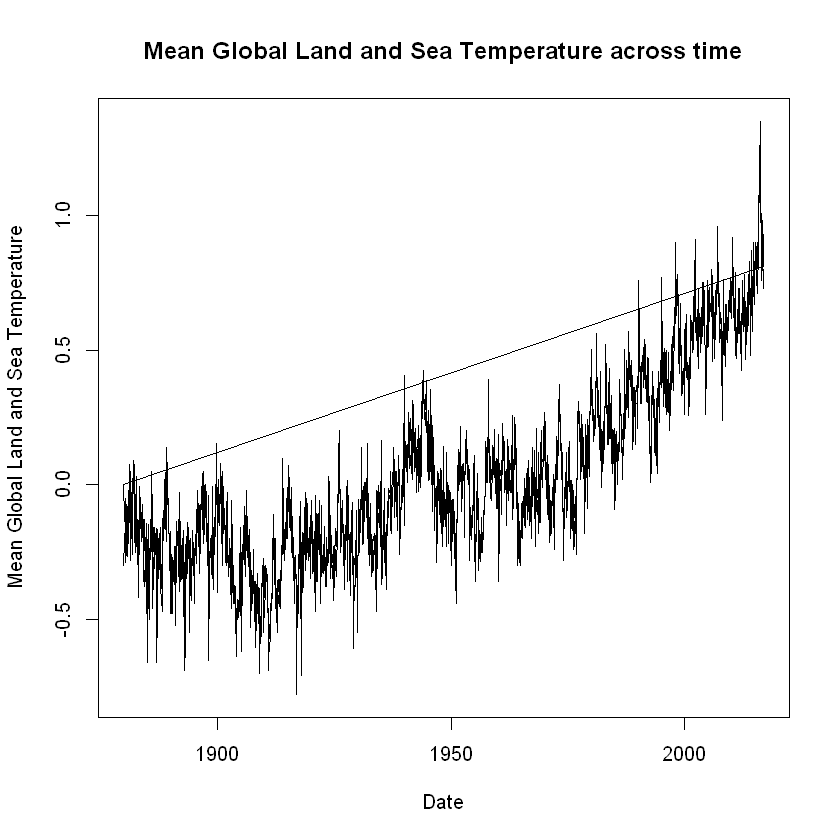

In [568]:
# Plot time series data
plot(data$Date, ts_data, type = "l", xlab = "Date", ylab = "Mean Global Land and Sea Temperature", main = "Mean Global Land and Sea Temperature across time")

Based on the plot illustrating the Mean Global Land and Sea Temperature across time, it's evident that temperatures exhibit a consistent upward trend. This trend suggests a gradual warming of both land and sea temperatures over the observed period. While there are minor fluctuations, the overall trajectory indicates a sustained increase in temperature, potentially reflective of broader climate patterns such as global warming.

<a id='Seasonality'></a>
### 2) Seasonality


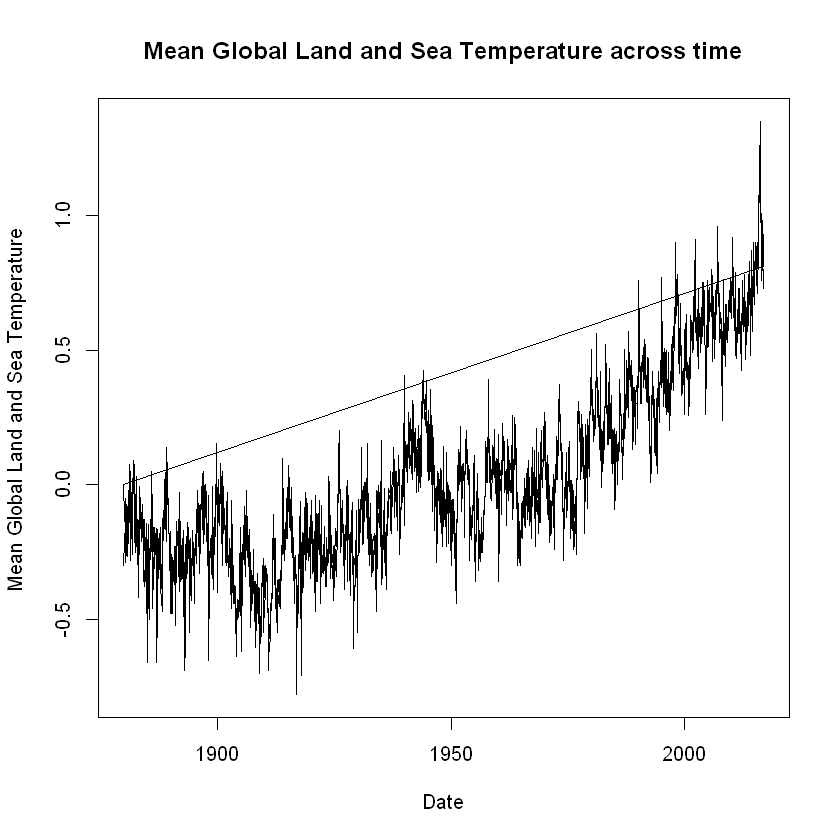

In [569]:
# Plot time series data
plot(data$Date, ts_data, type = "l", xlab = "Date", ylab = "Mean Global Land and Sea Temperature ", main = "Mean Global Land and Sea Temperature across time")

In [570]:
# Decompose the time series
decomposed_data <- decompose(ts_data)

# Plot the decomposed components
plot(decomposed_data)

ERROR: Error in decompose(ts_data): time series has no or less than 2 periods


In [571]:
# Try to plot the easonal subseries plot
seasonplot(ts_data)

ERROR: Error in seasonplot(ts_data): Data are not seasonal


Based on the plot illustrating the Mean Global Land and Sea Temperature across time and the attempt to plot the seasonal pattern, as well as the decomposition of the data to identify seasonal trends, it's evident that the time series does not exhibit any seasonal patterns. The visualizations and analysis indicate that the fluctuations in temperature do not follow a regular seasonal cycle. Consequently, attempts to plot the seasonal pattern or decompose the data resulted in errors, highlighting the absence of seasonal patterns in the dataset.

<a id='Outliers '></a>
### 3) Outliers 

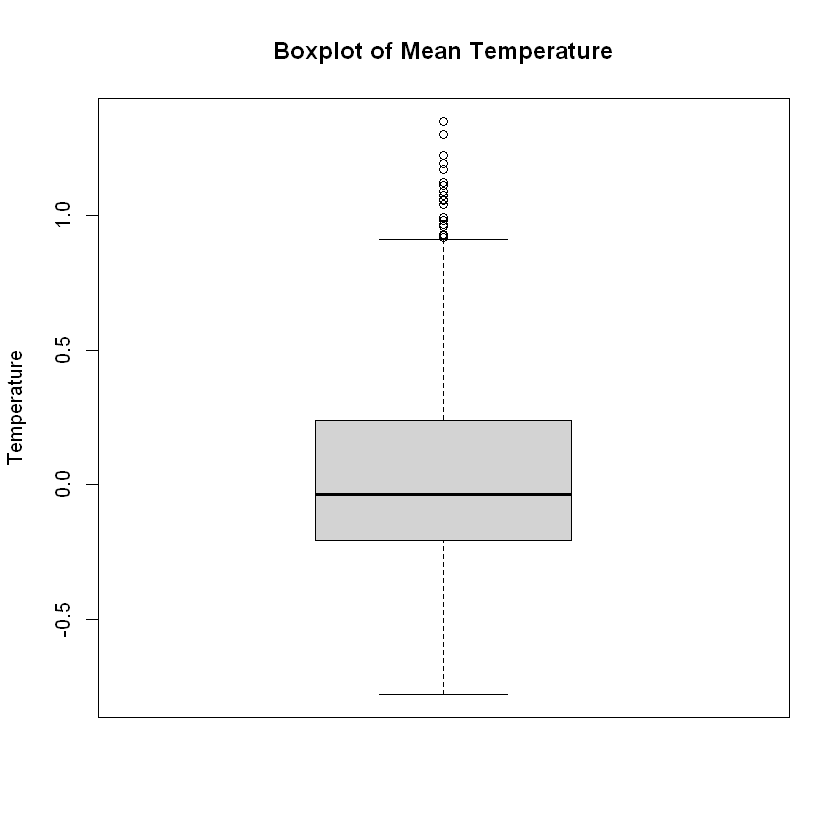

In [572]:
# Create a boxplot of the 'Mean' temperature data
boxplot(data$Mean, main = "Boxplot of Mean Temperature", ylab = "Temperature")


In [573]:
# Calculate the first and third quartiles
quantiles <- quantile(data$Mean, probs = c(0.25, 0.75))

# Calculate the interquartile range (IQR)
IQR <- quantiles[2] - quantiles[1]

# Calculate lower and upper bounds for outliers detection
lower_bound <- quantiles[1] - 1.5 * IQR
upper_bound <- quantiles[2] + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers <- data[data$Mean < lower_bound | data$Mean > upper_bound, ]

In [574]:
# Display the outliers identified in the 'outliers' object
print(outliers)

           Date   Mean
9    2016-04-01 1.0733
10   2016-03-01 1.2245
11   2016-02-01 1.1921
12   2016-01-01 1.0569
13   2015-12-01 1.1219
14   2015-11-01 0.9655
15   2015-10-01 0.9913
16   2015-09-01 0.9260
1646 2016-11-01 0.9300
1649 2016-08-01 0.9800
1652 2016-05-01 0.9300
1653 2016-04-01 1.0900
1654 2016-03-01 1.3000
1655 2016-02-01 1.3500
1656 2016-01-01 1.1700
1657 2015-12-01 1.1100
1658 2015-11-01 1.0400
1659 2015-10-01 1.0600
1726 2010-03-01 0.9200
1764 2007-01-01 0.9600


Based on the boxplot visualization and calculations, it's evident that the dataset contains outliers in the Mean Global Land and Sea Temperature over time readings. Remarkable instances include a particularly low temperature recorded in April 2016 at 1.0733 and unusually high temperatures in March and May 2016 exceeding 1.3. These unusual readings could be attributed to irregular weather patterns or potential measurement errors, as they fall outside the expected range based on the interquartile range (IQR) method for outlier detection.

<a id='Testing for Stationarity '></a>
## Testing for Stationarity

In this section, we conduct tests to determine if the time series data exhibits stationarity. These tests evaluate whether the statistical properties of the data remain constant over time. If the data lacks stationarity, we'll apply transformations or differencing to achieve stationarity before proceeding with modeling and forecasting.

Based on the previous analysis, it's evident that the time series exhibits trends. Trends signify systematic changes or movements in the data over time, violating the assumption of stationarity, which requires constant statistical properties like a stable mean and variance. Therefore, to address the non-stationarity observed in the time series, we will proceed with the Box-Cox transformation. This transformation is intended to stabilize the variance and reduce the influence of trends.

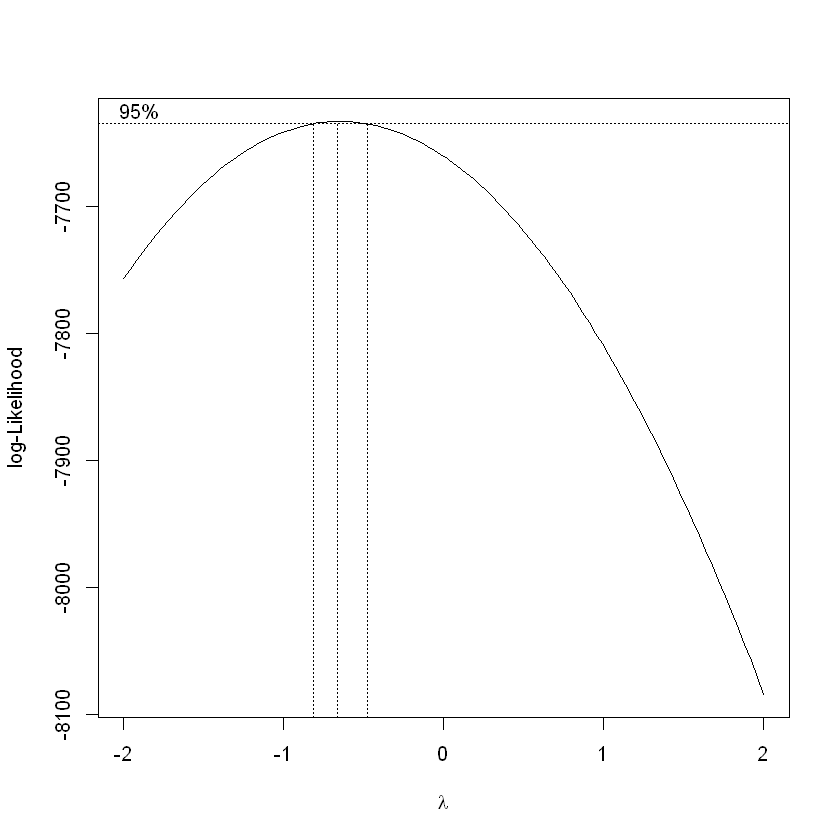

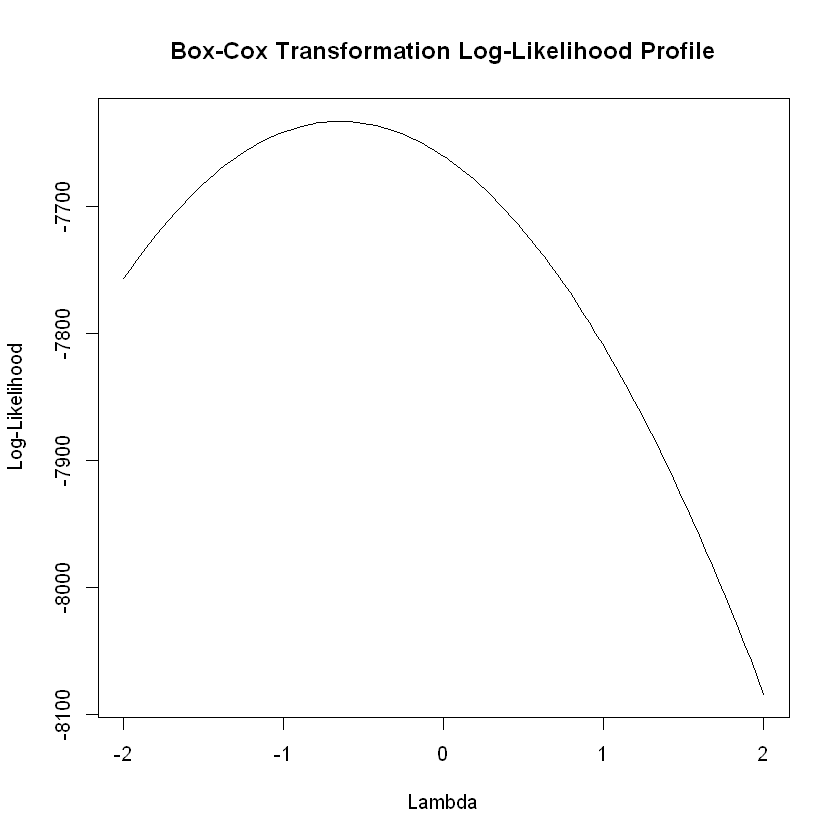

In [575]:
##Performing Box-Cox transformation to stabilize variance.

# Add a constant to the 'Mean' column to make it positive
constant <- abs(min(data$Mean)) + 1
mean_df <- data.frame(Mean = data$Mean + constant)

# Perform Box-Cox transformation
bc_results <- boxcox(Mean ~ 1, data = mean_df)

# Plot the Box-Cox log-likelihood profile
plot(bc_results$x, bc_results$y, type = "l", xlab = "Lambda", ylab = "Log-Likelihood",
     main = "Box-Cox Transformation Log-Likelihood Profile")

# Determine the optimal lambda value
optimal_lambda <- bc_results$x[which.max(bc_results$y)]

# Apply the Box-Cox transformation to your data
transformed_data <- ((data$Mean + constant)^optimal_lambda)

# Create a data frame with the transformed data
transformed_df <- data.frame(Mean = transformed_data)


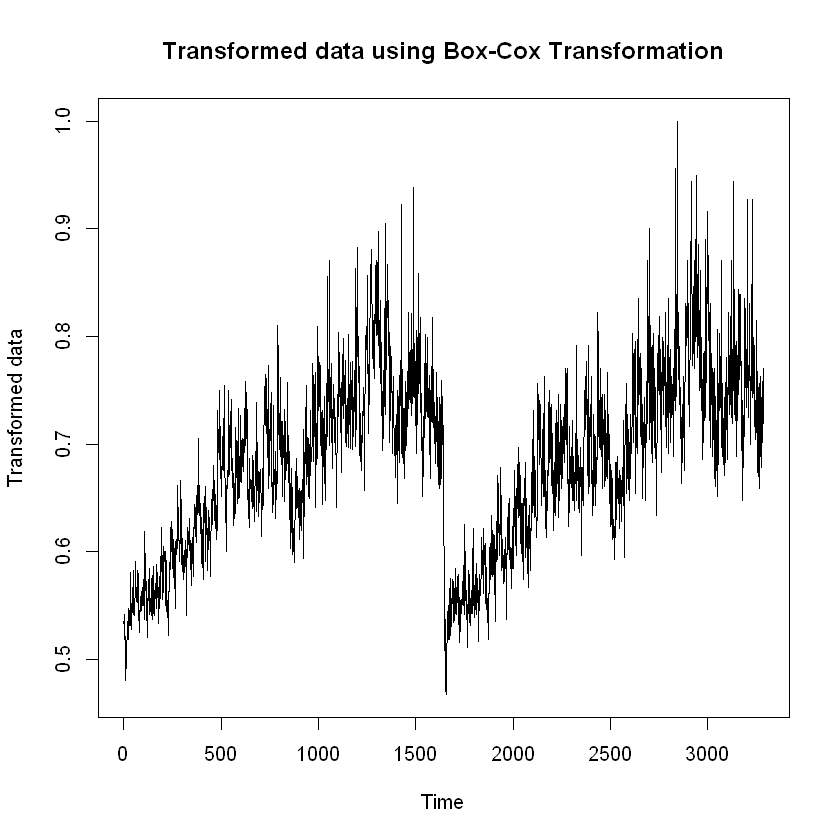

In [576]:
# Plot the transformed data
plot(transformed_data, type = "l", xlab = "Time", ylab = "Transformed data", 
     main = "Transformed data using Box-Cox Transformation")

Based on the plot of the Transformed data using the Box-Cox Transformation, it appears that the variance has been stabilized, and the influence of trends has been reduced. This suggests that the transformed data may exhibit stationarity, making it potentially more suitable for analysis using stationary time series models.

To confirm the stationarity of the data, we will conduct the Augmented Dickey-Fuller (ADF) test, a statistical test commonly used to determine the stationarity of a time series.

In [ ]:
# Perform Augmented Dickey-Fuller Test on the time series transformed_data
adf_result <- adf.test(transformed_data)

# Print the results
adf_result

Warning message in adf.test(transformed_data):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  transformed_data
Dickey-Fuller = -5.0001, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


The Augmented Dickey-Fuller (ADF) test results indicate a Dickey-Fuller statistic value of -5.0001 and a corresponding p-value of 0.01, which is smaller than the commonly used significance level of 0.05. indicating stationarity in the transformed data.


To validate the necessity for differencing in our time series analysis, we computed both the sample autocorrelation function (ACF) and partial autocorrelation function (PACF) to remove trends and make the data stationary.

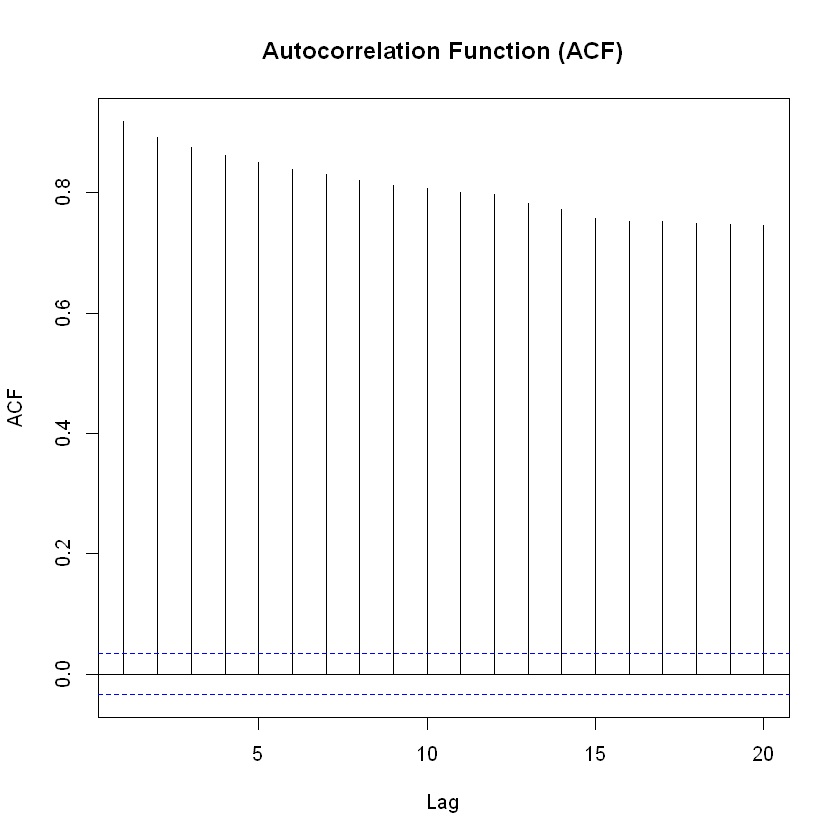

In [577]:
acf_result <- acf(transformed_data, lag.max = 20, main = "Autocorrelation Function (ACF)")

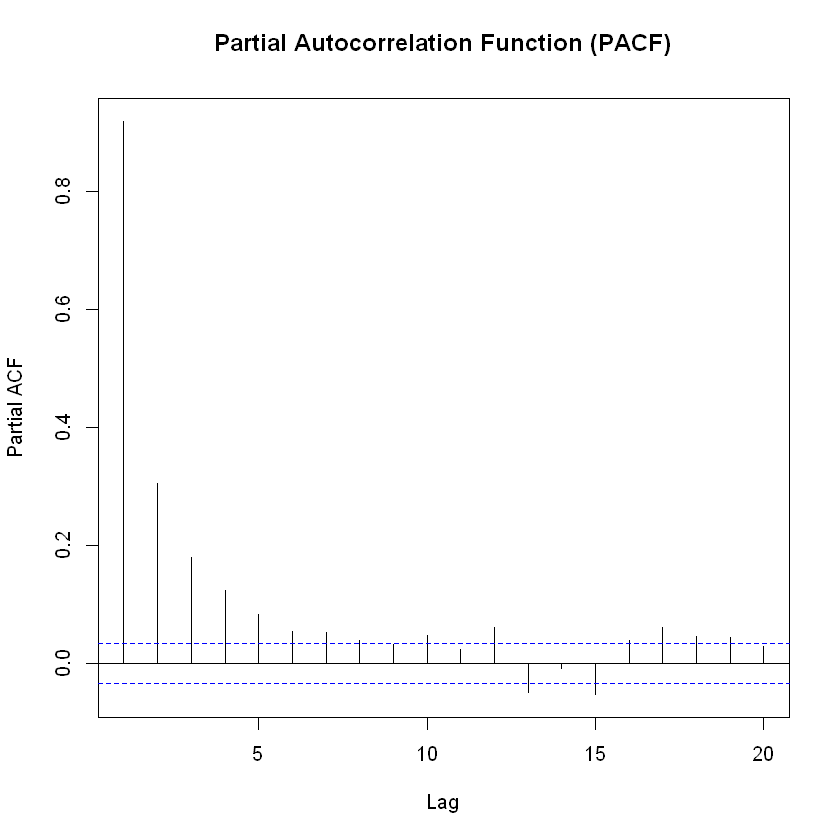

In [578]:
# Calculate partial autocorrelation function (PACF) for the training data with a maximum lag of 20
pacf_result <- pacf(transformed_data, lag.max = 20, main = "Partial Autocorrelation Function (PACF)")

Despite the indication of stationarity from the ADF test, a persistently slow decay in the autocorrelation function (ACF) was observed, signifying notable autocorrelation in the data. Consequently, differencing is necessary to address this autocorrelation and achieve stationarity. 

In [ ]:
# Calculate the first difference of the transformed data to achieve stationarity for modeling.
differentiated_data <- diff(transformed_data)

# Convert the differentiated data to a data frame
differentiated_data_df <- data.frame(Difference = differentiated_data)

<a id='Model specification'></a>
##  Model specification

In this section, we outline the process of model specification. We describe the data analysis methods used to determine our candidate models. Additionally, we discuss the criteria for model selection.

we split the differentiated data into training and test sets to evaluate the performance of our models. The training set, comprising 95% of the data, is used to train the models, while the remaining 5% constitutes the test set for model validation.

In [ ]:
# Split the differentiated data into training and test sets for model evaluation

# Define the percentage of data for training
train_percentage <- 0.95

# Calculate the number of observations for training
train_length <- round(length(differentiated_data) * train_percentage)

# Split the data into training and test sets
train_data <- differentiated_data[1:train_length]
test_data <- differentiated_data[(train_length + 1):length(differentiated_data)]

# Convert the training and test data vectors into data frames
train_data_df <- data.frame(Difference = train_data)
test_data_df <- data.frame(Difference = test_data)



<a id='ACF and PACF Plotting for Model Identification'></a>
### ACF and PACF Plotting for Model Identification

First, we start by plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify potential model structures. These plots serve as essential diagnostic tools for understanding the temporal dependencies present in the data and identifying suitable candidate models for further analysis.

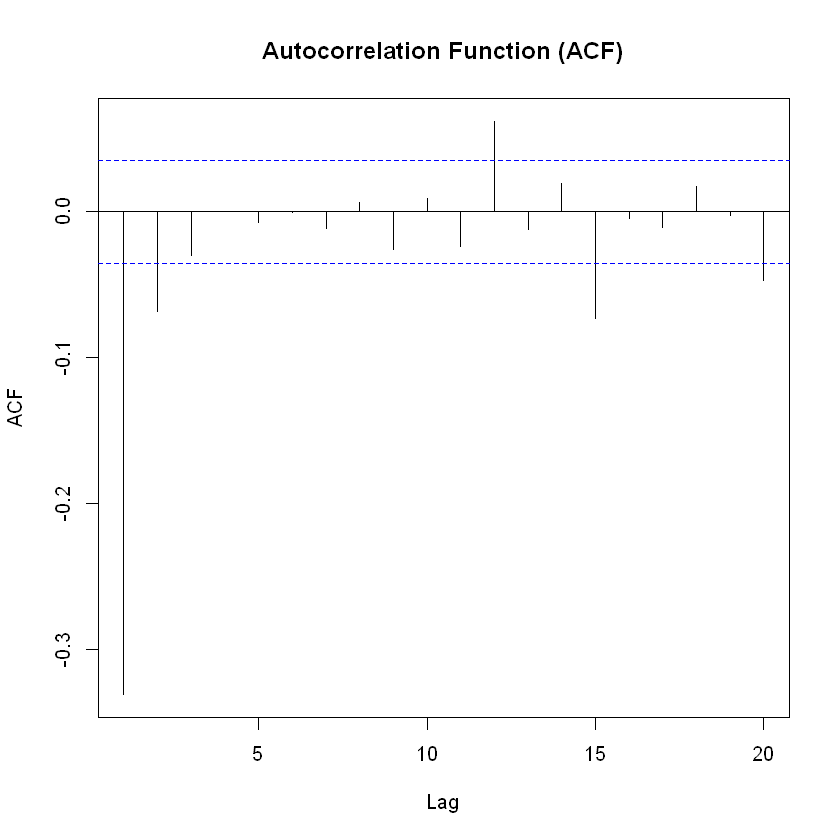

In [ ]:
# Calculate autocorrelation function (ACF) for the training data with a maximum lag of 20
acf(train_data, lag.max = 20, main = "Autocorrelation Function (ACF)")

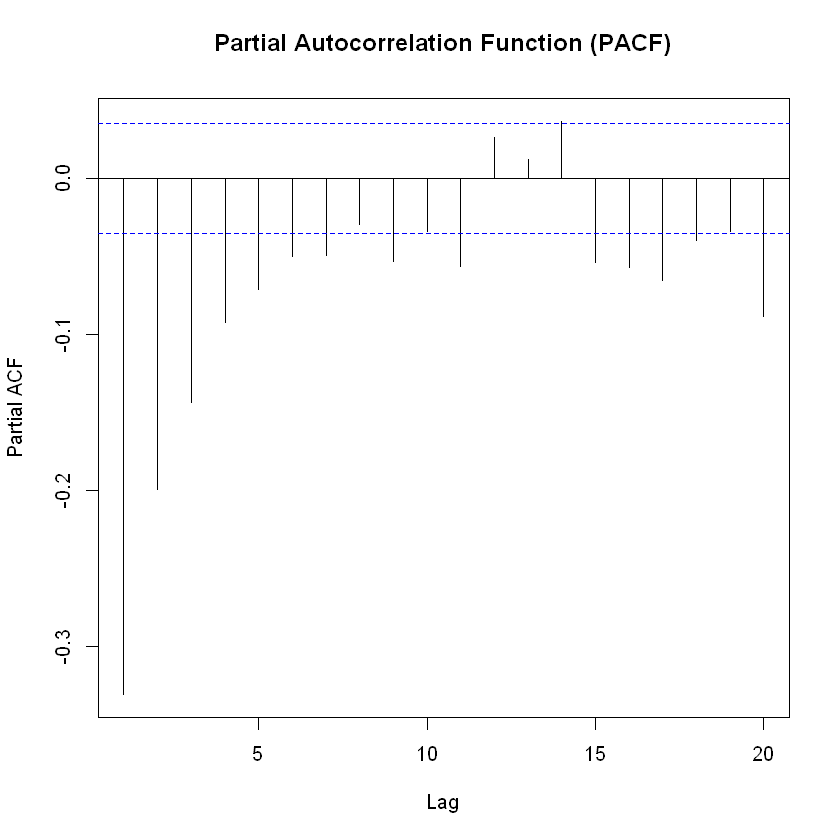

In [ ]:
# Calculate partial autocorrelation function (PACF) for the training data with a maximum lag of 20
pacf_result <- pacf(train_data, lag.max = 20, main = "Partial Autocorrelation Function (PACF)")

Based on the analysis of the ACF and PACF, an initial candidate model could be an MA(1) model. The PACF shows exponential decay, indicating that most correlation is explained by the first few lag terms. Moreover, a significant spike at lag 1 in the ACF, with no significant spikes beyond lag 1, supports the choice of an MA(1) model

<a id='AIC Test for Model Identification'></a>
### AIC Test for Model Identification

Second, we conduct the Akaike Information Criterion (AIC) test to determine the most suitable model for our dataset. This evaluation method assesses the goodness of fit of various models while considering the trade-off between model complexity and performance.

In [ ]:
# Fit multiple ARIMA models using the auto.arima function and perform the Akaike Information Criterion (AIC) test to select the best model based on the least AIC value
arima_models <- auto.arima(train_data, trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -13434.07
 ARIMA(0,0,0) with non-zero mean : -12775.26
 ARIMA(1,0,0) with non-zero mean : -13134
 ARIMA(0,0,1) with non-zero mean : -13333.22
 ARIMA(0,0,0) with zero mean     : -12777.25
 ARIMA(1,0,2) with non-zero mean : -13422.47
 ARIMA(2,0,1) with non-zero mean : -13400.25
 ARIMA(3,0,2) with non-zero mean : -13417.89
 ARIMA(2,0,3) with non-zero mean : -13432
 ARIMA(1,0,1) with non-zero mean : -13395.96
 ARIMA(1,0,3) with non-zero mean : -13432.96
 ARIMA(3,0,1) with non-zero mean : -13413.83
 ARIMA(3,0,3) with non-zero mean : -13432.36
 ARIMA(2,0,2) with zero mean     : -13435.36
 ARIMA(1,0,2) with zero mean     : -13423.86
 ARIMA(2,0,1) with zero mean     : -13402
 ARIMA(3,0,2) with zero mean     : Inf
 ARIMA(2,0,3) with zero mean     : -13433.15
 ARIMA(1,0,1) with zero mean     : -13397.81
 ARIMA(1,0,3) with zero mean     : -13434.41
 ARIMA(3,0,1) with zero mean     : -13415.13
 ARIMA(3,

Using the automatic ARIMA selection method, we identified the ARIMA(2,0,2) model with a zero mean as the optimal choice due to its lowest AIC value (-13437.43). Following this, we refined our analysis by re-estimating this model without approximations. Subsequently, the ARIMA(2,0,2) model with a zero mean was selected for further analysis and forecasting.

<a id='BIC Test for Model Identification'></a>
### BIC Test for Model Identification

Third, we proceed with the Bayesian Information Criterion (BIC) test to determine the optimal model for our dataset. The BIC evaluates the goodness of fit of different models, but it imposes a stricter penalty on model complexity.

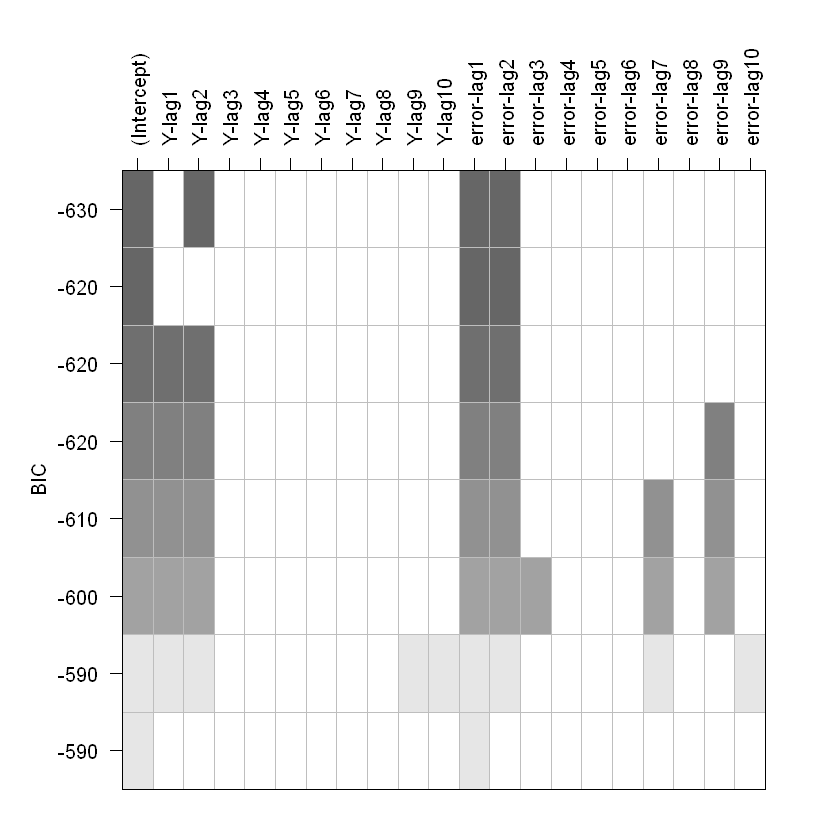

In [ ]:
# Plot the ARMA subset selection using the Bayesian Information Criterion (BIC) to visualize different model configurations and select the best model based on the least BIC value
plot(armasubsets(train_data, nar = 10, nma = 10))

After plotting ARMASUBSETS for the training data, we analyze the matrix generated, focusing on the row with the lowest BIC value of -630. This row corresponds to the ARMA model configuration that exhibits the best balance between model complexity and performance. Within this configuration, the "Y-lag" parameter denotes the autoregressive (AR) order, while the "error-lag" parameter signifies the moving average (MA) order. Specifically, our selected model configurations include AR(2), MA(1), MA(2), ARIMA(2,0,1), and ARIMA(2,0,2). 

After conducting ACF and PACF analysis, as well as AIC Test for Model Identification and BIC Test for Model Identification, the candidate models identified are **AR2**, **MA1**, **MA2**, **ARIMA(2,0,1)**, and **ARIMA(2,0,2)**.

<a id='Fitting and Diagnostics'></a>
##  Fitting and Diagnostics

In this section, we aim to find the best model for forecasting by fitting the different candidate models and conducting thorough diagnostics. We closely examine the residuals of each model using various tests and analyses to assess their suitability for accurate forecasting.

A good model will produce residuals with the following properties:
- **The residuals are uncorrelated** ( Autocorrelation Function (ACF) Plot, Ljung-Box Test, Runs Test ).
- **The residuals have zero mean** ( Histogram Plot, lot of Risiduals ).
- **The residuals have constant variance** ( Plot of Risiduals ).
- **The residuals are normally distributed** ( QQ Plot, Shapiro-Wilk Test ).



<a id='The ARIMA(2, 0, 2) model'></a>
### 1) The ARIMA(2, 0, 2) model

In [ ]:
# Fit the ARIMA(2, 0, 2) model
arima_model <- arima(train_data, order=c(2, 0, 2))

In [ ]:
# Obtain residuals
residuals_arima <- residuals(arima_model)

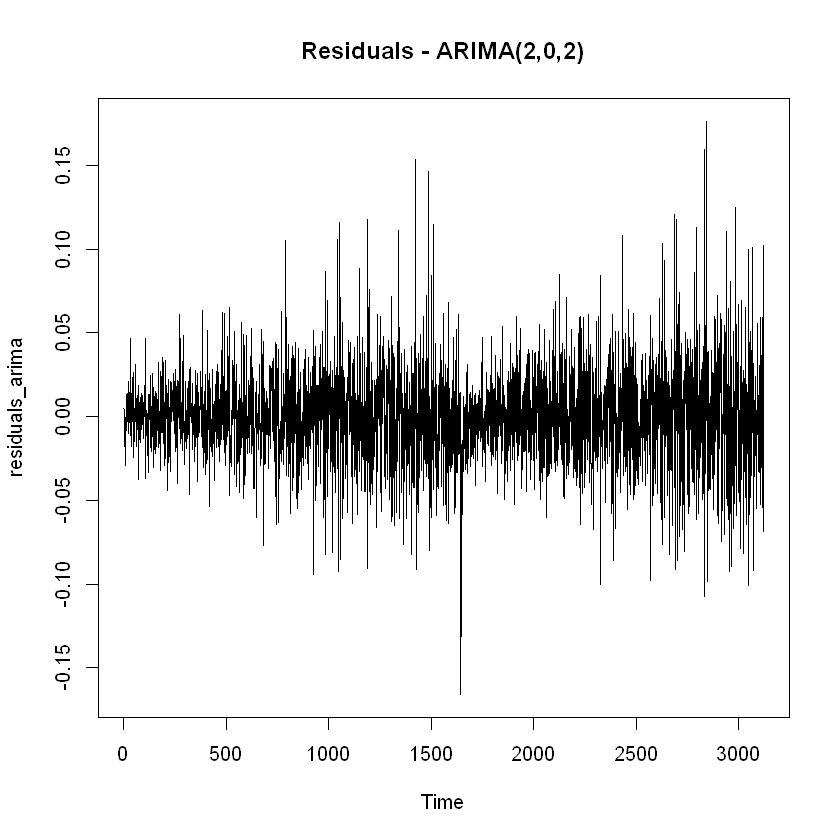

In [ ]:
# Plot residuals for visual inspection
plot(residuals_arima, main="Residuals - ARIMA(2,0,2)")

Upon examining the plot of Residuals - ARIMA(2,0,2), it suggests that the variance is likely relatively stable, although not strictly constant. The consistent spread of points around the zero line indicates a degree of uniform variability in residuals. Additionally, the symmetrical distribution of points above and below the zero line confirms a zero mean, signifying balanced deviations from the mean in both positive and negative directions. Overall, while the variance may not be perfectly constant, the observed pattern indicates a reasonable level of stability.

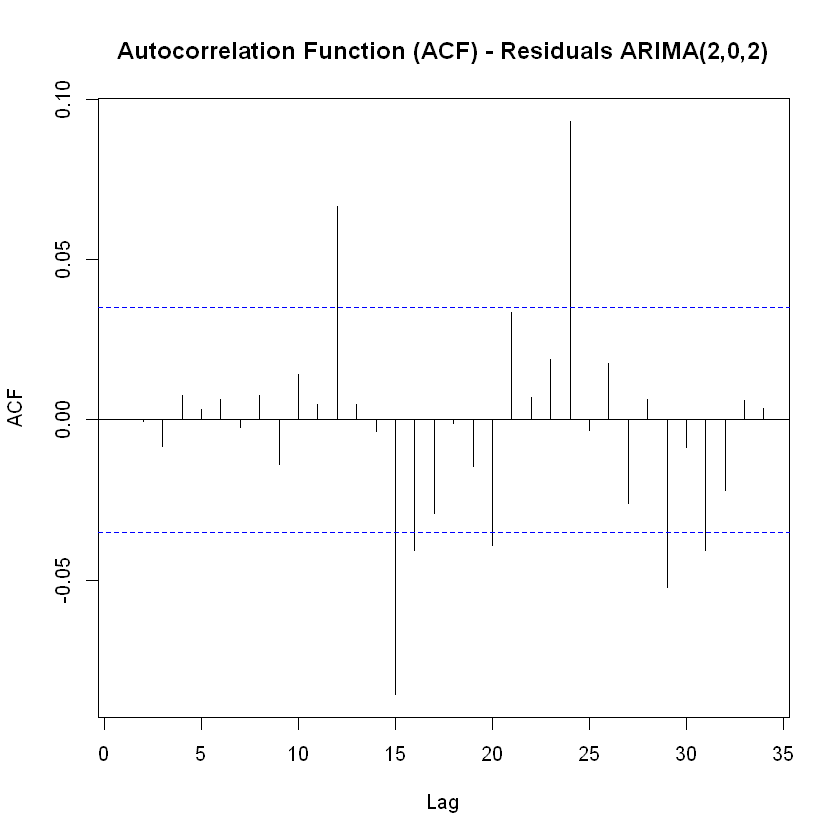

In [ ]:
# Plot Cumulative Autocorrelation Function (CAF)
acf(residuals_arima, main="Autocorrelation Function (ACF) - Residuals ARIMA(2,0,2)")

Upon reviewing the Autocorrelation Function (ACF) - Residuals ARIMA(2,0,2) plot, we notice that most of bars lie within the confidence interval. This observation suggests that the autocorrelations of the residuals are not significantly different from zero, indicating uncorrelated residuals and a well-fitted model.

In [ ]:
# Perform Ljung-Box Test
ljung_box_test <- Box.test(residuals_arima, lag = 20, type = "Ljung-Box")

# Print test results
print(ljung_box_test)


	Box-Ljung test

data:  residuals_arima
X-squared = 52.617, df = 20, p-value = 9.251e-05



The Box-Ljung test statistic is 52.617 with 20 degrees of freedom, resulting in a p-value of 9.251e-05, which is substantially smaller than the typical significance level (α = 0.05). This suggests strong evidence against the null hypothesis of no autocorrelation, indicating that autocorrelation exists in the residuals

In [ ]:
# Convert residuals of ARIMA model to binary based on sign (Positive/Negative)
residuals_binary <- ifelse(residuals_arima >= 0, "Positive", "Negative")

# Convert binary residuals to a factor with levels ordered as "Negative" and "Positive"
residuals_factor <- factor(residuals_binary, levels = c("Negative", "Positive"))

# Run a runs test on the factorized residuals to assess randomness in sign patterns
runs_test <- runs.test(residuals_factor)

# Print the results of the runs test
runs_test


	Runs Test

data:  residuals_factor
Standard Normal = -2.1596, p-value = 0.03081
alternative hypothesis: two.sided


The Runs Test results in a Standard Normal value of -2.1596 and a p-value of 0.03081. With a p-value below the significance level (typically 0.05), we reject the null hypothesis, indicating that there is evidence to suggest that the distribution of runs in the residuals is not consistent with randomness. This suggests that the distribution of runs in the residuals does not follow a random pattern.

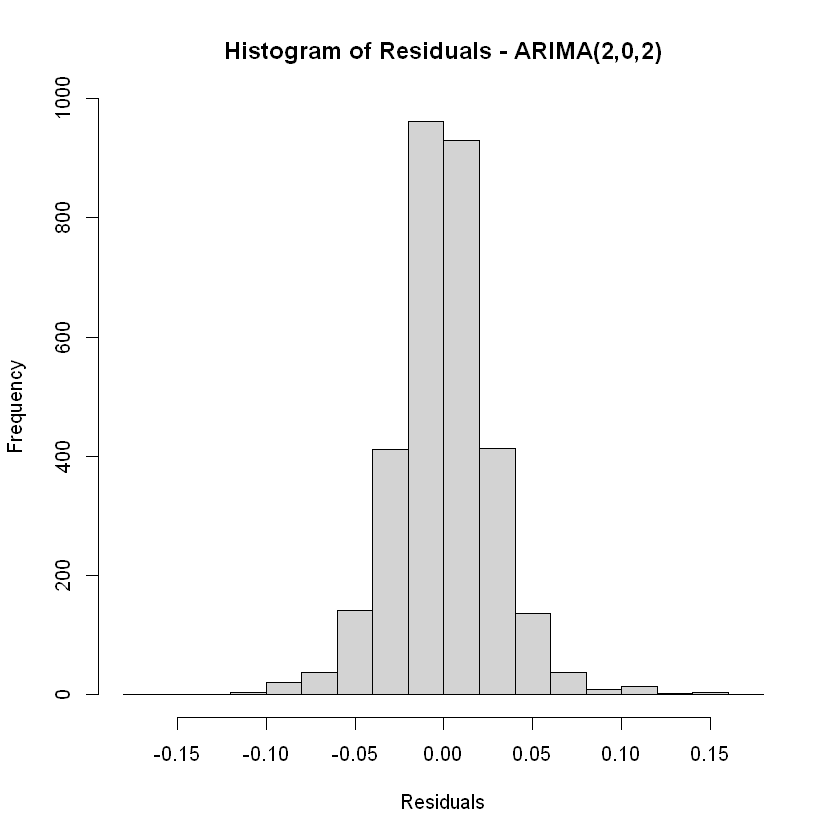

In [ ]:
# Create a histogram of ARIMA model residuals to visualize their distribution
hist(residuals_arima, main="Histogram of Residuals - ARIMA(2,0,2)", xlab="Residuals", ylab="Frequency")

Upon observing the Histogram of Residuals - ARIMA(2,0,2), the symmetric distribution around zero implies that, on average, the residuals tend to balance out to zero. This symmetry suggests that the model is effectively capturing the underlying patterns in the data, resulting in residuals that oscillate around zero without any systematic bias towards positive or negative values. 

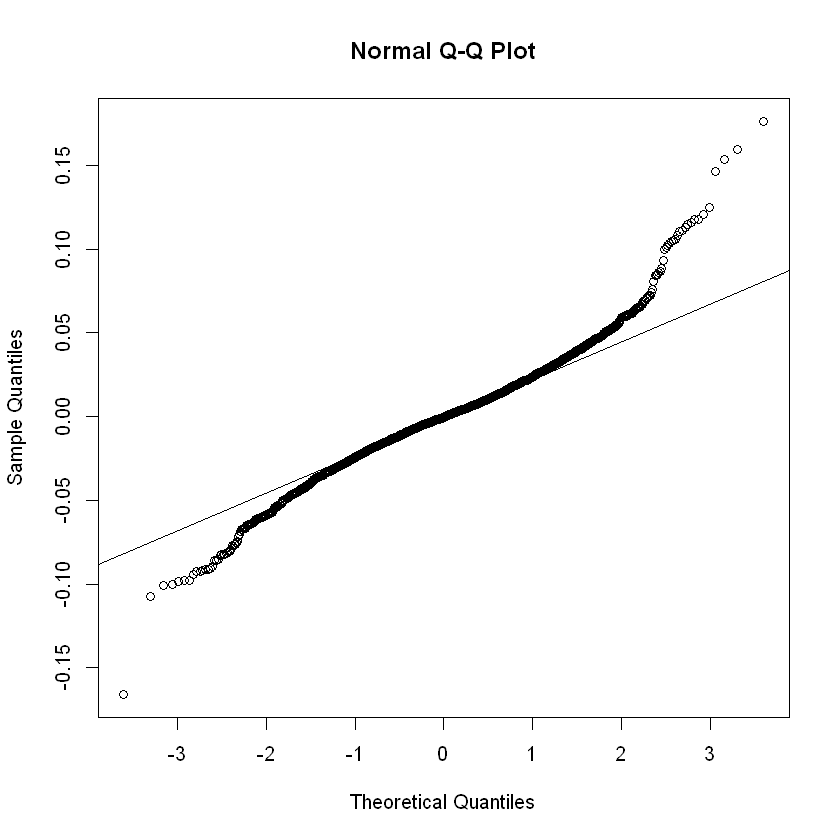

In [ ]:
# Create a QQ plot of ARIMA model residuals to assess normality assumption
qqnorm(residuals_arima)
qqline(residuals_arima)

After visualizing the QQ plot of the residuals, it became evident that the distribution of residuals deviates from the expected normal distribution, particularly towards the tails. This deviation from normality, indicates that the residuals may not follow a perfectly Gaussian distribution.

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test <- shapiro.test(residuals_arima)

# Print the results of the Shapiro-Wilk test
shapiro_test


	Shapiro-Wilk normality test

data:  residuals_arima
W = 0.96873, p-value < 2.2e-16


The Shapiro-Wilk normality test was performed on the residuals of the ARIMA model, yielding a test statistic (W) of 0.96873 and an extremely low p-value (< 2.2e-16). This result suggests that the data significantly deviates from a normal distribution. The low p-value indicates strong evidence against the null hypothesis of normality, indicating that the residuals are not normally distributed.

<a id='The ARIMA(2, 0, 1) model'></a>
### 2) The ARIMA(2, 0, 1) model

In [ ]:
# Fit the ARIMA(2, 0, 1) model
arima_201_model <- arima(train_data, order=c(2, 0, 1))

In [ ]:
# Obtain residuals
residuals_arima_201 <- residuals(arima_201_model)

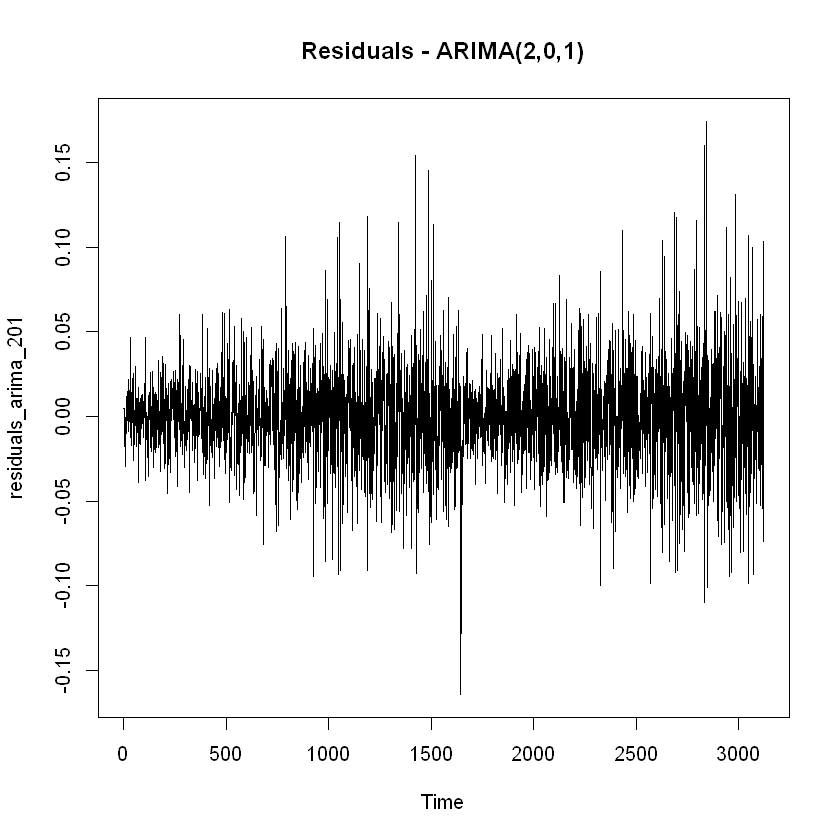

In [ ]:
# Plot residuals for visual inspection
plot(residuals_arima_201, main="Residuals - ARIMA(2,0,1)")

Upon examining the plot of Residuals - ARIMA(2,0,1), it suggests that the variance is likely relatively stable, although not strictly constant. The consistent spread of points around the zero line indicates a degree of uniform variability in residuals. Additionally, the symmetrical distribution of points above and below the zero line confirms a zero mean, signifying balanced deviations from the mean in both positive and negative directions. Overall, while the variance may not be perfectly constant, the observed pattern indicates a reasonable level of stability.

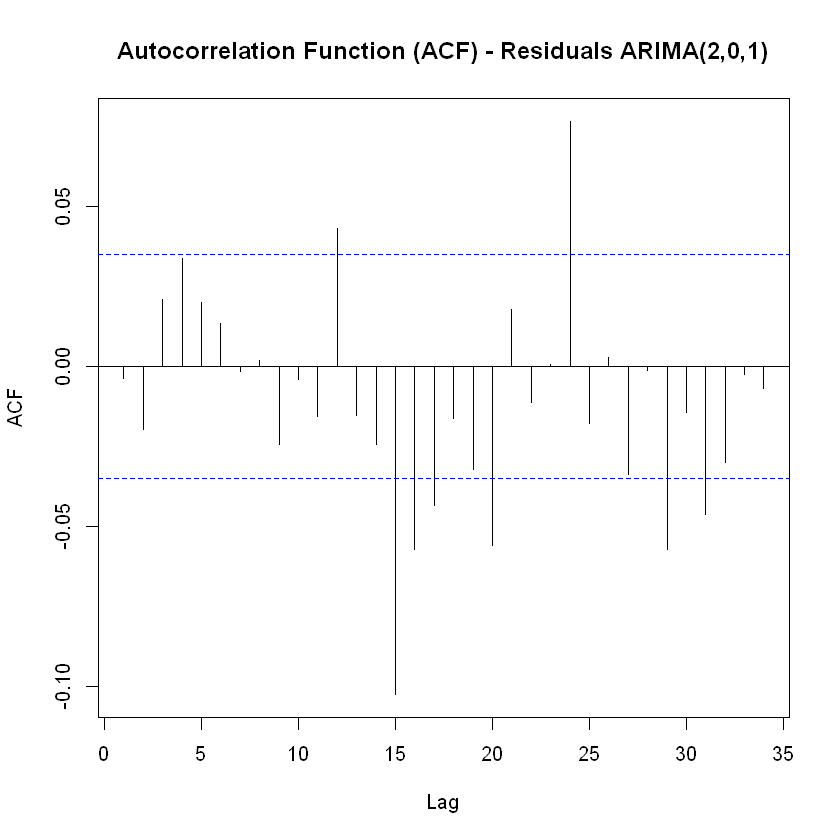

In [ ]:
# Plot Cumulative Autocorrelation Function (CAF)
acf(residuals_arima_201, main="Autocorrelation Function (ACF) - Residuals ARIMA(2,0,1)")

Upon reviewing the Autocorrelation Function (ACF) - Residuals ARIMA(2,0,1) plot, we observe that more bars fall within the confidence interval compared to those outside it, indicating that a substantial portion of the autocorrelations of the residuals are not significantly different from zero. However, there are still many bars that extend beyond the confidence interval, suggesting potential autocorrelation in the residuals. This indicates areas where the model may not fully capture all underlying dependencies in the data, necessitating further investigation and potential model refinement.

In [ ]:
# Perform Ljung-Box Test
ljung_box_test_arima_201 <- Box.test(residuals_arima_201, lag = 20, type = "Ljung-Box")

# Print test results
print(ljung_box_test_arima_201)


	Box-Ljung test

data:  residuals_arima_201
X-squared = 82.603, df = 20, p-value = 1.413e-09



The Box-Ljung test statistic is 82.603 with 20 degrees of freedom, resulting in a p-value of 1.413e-09, significantly smaller than the typical significance level (α = 0.05). This provides strong evidence against the null hypothesis of no autocorrelation, indicating that autocorrelation exists in the residuals.

In [ ]:
# Convert residuals of ARIMA(2,0,1) model to binary based on sign (Positive/Negative)
residuals_binary_arima_201 <- ifelse(residuals_arima_201 >= 0, "Positive", "Negative")

# Convert binary residuals to a factor with levels ordered as "Negative" and "Positive"
residuals_factor_arima_201 <- factor(residuals_binary_arima_201, levels = c("Negative", "Positive"))

# Run a runs test on the factorized residuals to assess randomness in sign patterns
runs_test_arima_201 <- runs.test(residuals_factor_arima_201)

# Print the results of the runs test
runs_test_arima_201


	Runs Test

data:  residuals_factor_arima_201
Standard Normal = -2.6658, p-value = 0.007682
alternative hypothesis: two.sided


The Runs Test reveals a Standard Normal value of -2.6658 and a p-value of 0.007682. With the p-value falling below the conventional significance level of 0.05, we reject the null hypothesis. This provides evidence suggesting that the distribution of runs in the residuals is not consistent with randomness. Therefore, it implies that the distribution of runs in the residuals does not follow a random pattern.

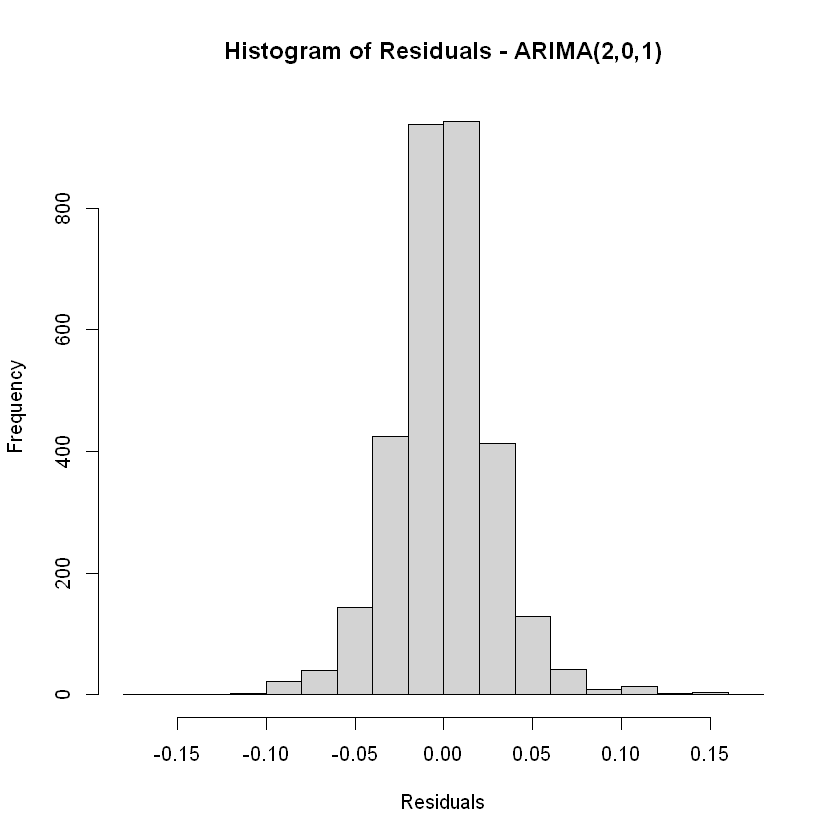

In [ ]:
# Create a histogram of ARIMA(2,0,1) model residuals to visualize their distribution
hist(residuals_arima_201, main="Histogram of Residuals - ARIMA(2,0,1)", xlab="Residuals", ylab="Frequency")

Upon observing the Histogram of Residuals - ARIMA(2,0,1), the symmetric distribution around zero implies that, on average, the residuals tend to balance out to zero. This symmetry suggests that the model is effectively capturing the underlying patterns in the data, resulting in residuals that oscillate around zero without any systematic bias towards positive or negative values. 

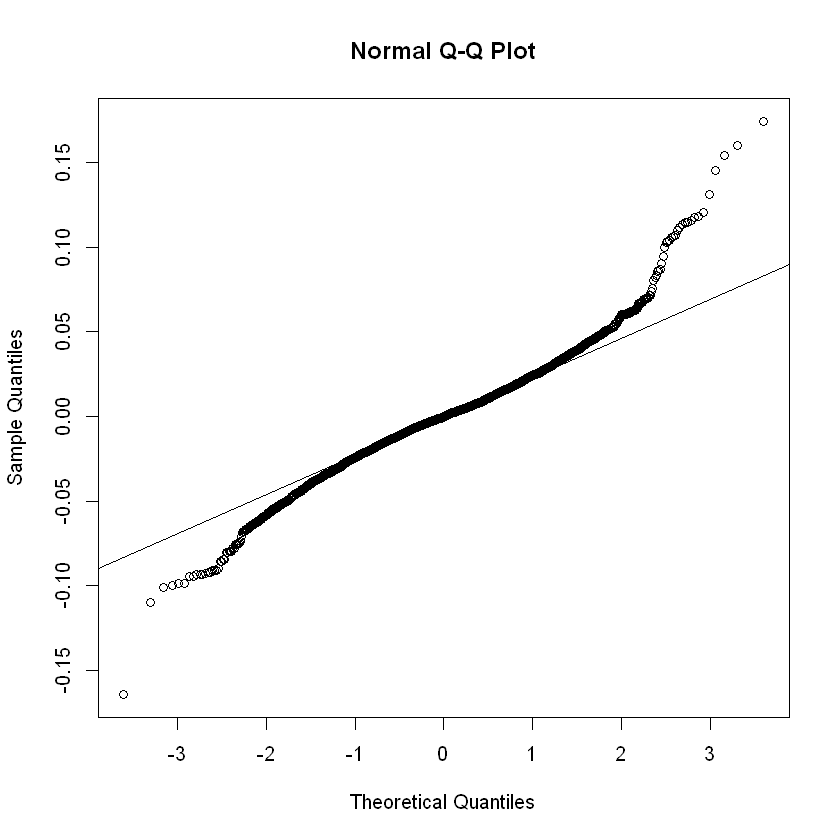

In [ ]:
# Create a QQ plot of ARIMA(2,0,1) model residuals to assess normality assumption
qqnorm(residuals_arima_201)
qqline(residuals_arima_201)

After visualizing the QQ plot of the residuals, it became evident that the distribution of residuals deviates from the expected normal distribution, particularly towards the tails. This deviation from normality, indicates that the residuals may not follow a perfectly Gaussian distribution.

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test_arima_201 <- shapiro.test(residuals_arima_201)

# Print the results of the Shapiro-Wilk test
shapiro_test_arima_201


	Shapiro-Wilk normality test

data:  residuals_arima_201
W = 0.96855, p-value < 2.2e-16


The Shapiro-Wilk normality test was conducted on the residuals of the ARIMA(2,0,2) model, resulting in a test statistic (W) of 0.96855 and an extremely low p-value (p < 2.2e-16). With such a low p-value, significantly less than the conventional significance level of 0.05, we reject the null hypothesis that the residuals are normally distributed. This indicates strong evidence against normality, suggesting that the residuals do not follow a Gaussian distribution.

<a id='The MA(1) model'></a>
### 3) The MA(1) model

In [ ]:
# Fit the MA(1) model
ma1_model <- arima(train_data, order=c(0, 0, 1))

In [ ]:
# Obtain residuals
residuals_ma1 <- residuals(ma1_model)

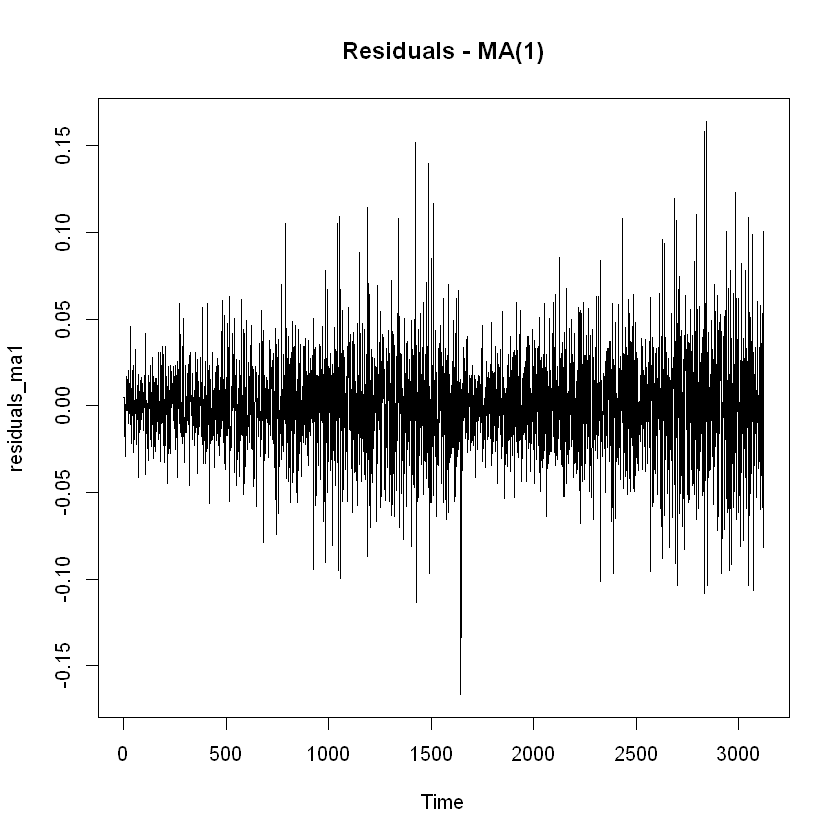

In [ ]:
# Plot residuals for visual inspection
plot(residuals_ma1, main="Residuals - MA(1)")

Upon examining the plot of Residuals - MA(1), it suggests that the variance is likely relatively stable, although not strictly constant. The consistent spread of points around the zero line indicates a degree of uniform variability in residuals. Additionally, the symmetrical distribution of points above and below the zero line confirms a zero mean, signifying balanced deviations from the mean in both positive and negative directions. Overall, while the variance may not be perfectly constant, the observed pattern indicates a reasonable level of stability.

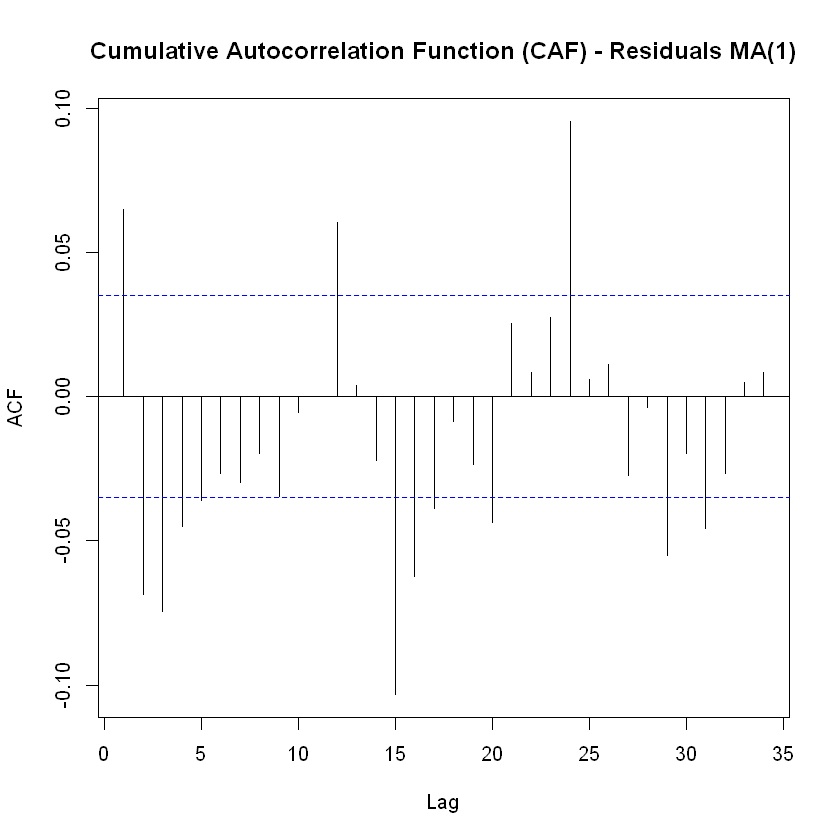

In [ ]:
# Plot Cumulative Autocorrelation Function (CAF)
acf(residuals_ma1, main="Autocorrelation Function (ACF) - Residuals MA(1)")

Upon reviewing the Autocorrelation Function (ACF) - Residuals MA(1) plot, we observe that more bars fall within the confidence interval compared to those outside it, indicating that a substantial portion of the autocorrelations of the residuals are not significantly different from zero. However, there are still many bars that extend beyond the confidence interval, suggesting potential autocorrelation in the residuals. This indicates areas where the model may not fully capture all underlying dependencies in the data, necessitating further investigation and potential model refinement.

In [ ]:
# Perform Ljung-Box Test
ljung_box_test_ma1 <- Box.test(residuals_ma1, lag = 20, type = "Ljung-Box")

# Print test results
print(ljung_box_test)


	Box-Ljung test

data:  residuals_arima
X-squared = 52.617, df = 20, p-value = 9.251e-05



The Box-Ljung test statistic is 52.617 with 20 degrees of freedom, yielding a p-value of 9.251e-05, which is substantially smaller than the typical significance level (α = 0.05). This indicates strong evidence against the null hypothesis of no autocorrelation, suggesting that autocorrelation exists in the residuals.

In [ ]:
# Convert residuals of MA(1) model to binary based on sign (Positive/Negative)
residuals_binary_ma1 <- ifelse(residuals_ma1 >= 0, "Positive", "Negative")

# Convert binary residuals to a factor with levels ordered as "Negative" and "Positive"
residuals_factor_ma1 <- factor(residuals_binary_ma1, levels = c("Negative", "Positive"))

# Run a runs test on the factorized residuals to assess randomness in sign patterns
runs_test_ma1 <- runs.test(residuals_factor_ma1)

# Print the results of the runs test
runs_test_ma1



	Runs Test

data:  residuals_factor_ma1
Standard Normal = -4.664, p-value = 3.102e-06
alternative hypothesis: two.sided


The Runs Test yields a Standard Normal value of -4.664 and a p-value of 3.102e-06. As the p-value is well below the typical significance level of 0.05, we reject the null hypothesis. This indicates strong evidence suggesting that the distribution of runs in the residuals is not consistent with randomness. Consequently, it implies that the distribution of runs in the residuals does not follow a random pattern.

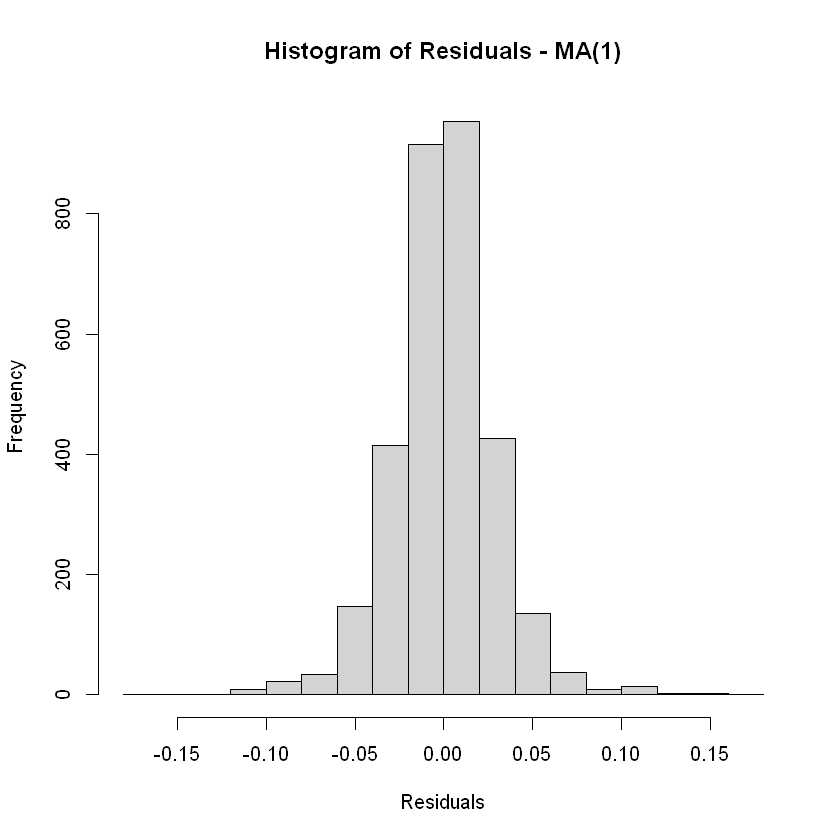

In [ ]:
# Create a histogram of MA(1) model residuals to visualize their distribution
hist(residuals_ma1, main="Histogram of Residuals - MA(1)", xlab="Residuals", ylab="Frequency")

Upon observing the Histogram of Residuals - MA(1), the symmetric distribution around zero implies that, on average, the residuals tend to balance out to zero. This symmetry suggests that the model is effectively capturing the underlying patterns in the data, resulting in residuals that oscillate around zero without any systematic bias towards positive or negative values. 

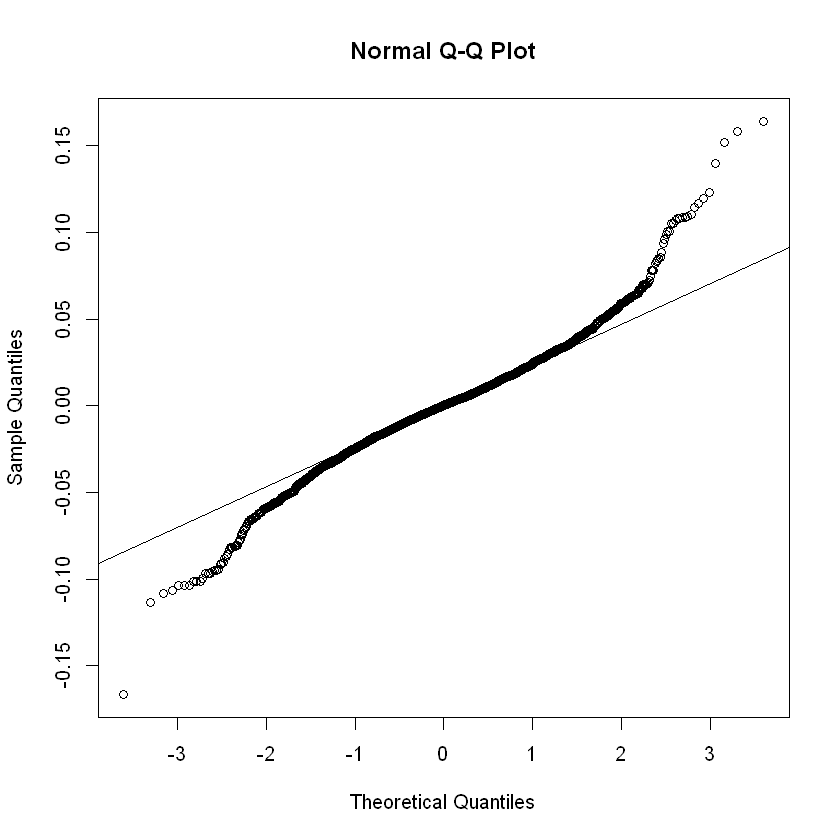

In [ ]:
# Create a QQ plot of MA(1) model residuals to assess normality assumption
qqnorm(residuals_ma1)
qqline(residuals_ma1)

After visualizing the QQ plot of the residuals, it became evident that the distribution of residuals deviates from the expected normal distribution, particularly towards the tails. This deviation from normality, indicates that the residuals may not follow a perfectly Gaussian distribution.

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test_ma1 <- shapiro.test(residuals_ma1)

# Print the results of the Shapiro-Wilk test
shapiro_test_ma1


	Shapiro-Wilk normality test

data:  residuals_ma1
W = 0.97001, p-value < 2.2e-16


The Shapiro-Wilk normality test was conducted on the residuals of the ARIMA(1,0,1) model, resulting in a test statistic (W) of 0.97001 and an extremely low p-value (< 2.2e-16). This outcome indicates a significant departure from normality in the residuals. The small p-value suggests strong evidence against the null hypothesis of normality, implying that the residuals are not normally distributed.

<a id='The MA(2) model'></a>
### 4) The MA(2) model

In [ ]:
# Fit the MA(2) model
ma2_model <- arima(train_data, order=c(0, 0, 2))

In [ ]:
# Obtain residuals
residuals_ma2 <- residuals(ma2_model)

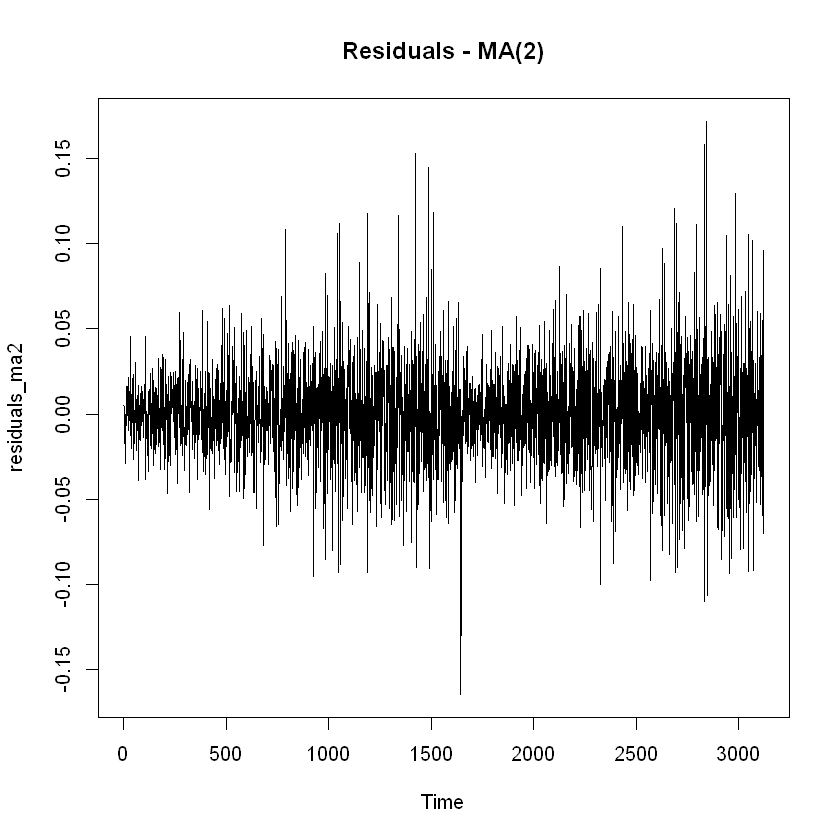

In [ ]:
# Plot residuals for visual inspection
plot(residuals_ma2, main="Residuals - MA(2)")

Upon examining the plot of Residuals - MA(2), it suggests that the variance is likely relatively stable, although not strictly constant. The consistent spread of points around the zero line indicates a degree of uniform variability in residuals. Additionally, the symmetrical distribution of points above and below the zero line confirms a zero mean, signifying balanced deviations from the mean in both positive and negative directions. Overall, while the variance may not be perfectly constant, the observed pattern indicates a reasonable level of stability.

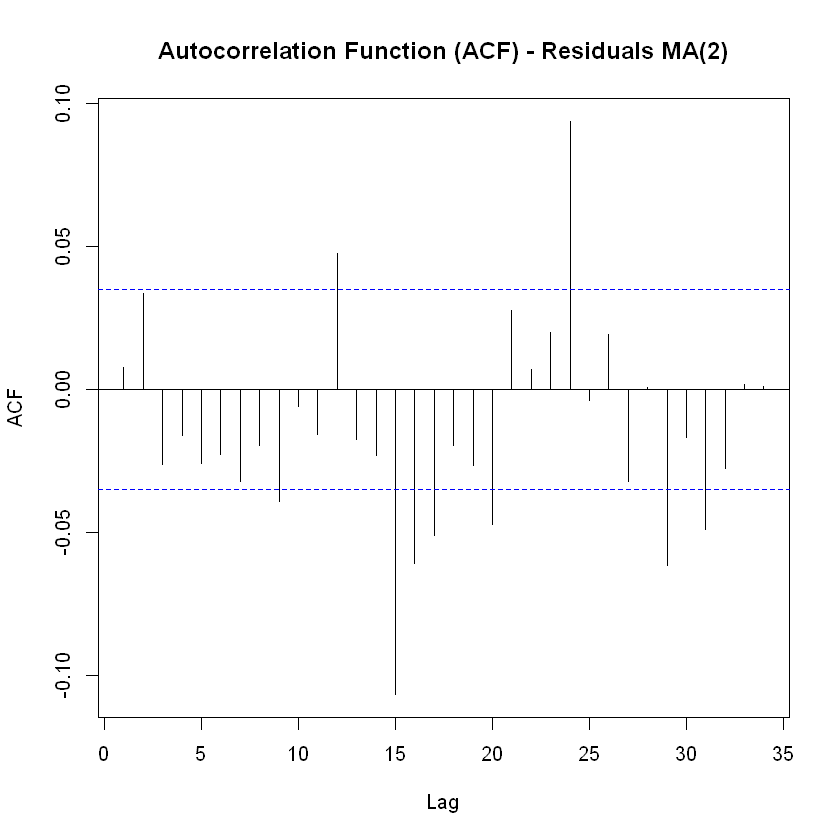

In [ ]:
# Plot Cumulative Autocorrelation Function (CAF)
acf(residuals_ma2, main="Autocorrelation Function (ACF) - Residuals MA(2)")

Upon reviewing the Autocorrelation Function (ACF) - Residuals MA(2) plot, we notice that most of bars lie within the confidence interval. This observation suggests that the autocorrelations of the residuals are not significantly different from zero, indicating uncorrelated residuals and a well-fitted model.

In [ ]:
# Perform Ljung-Box Test
ljung_box_test_ma2 <- Box.test(residuals_ma2, lag = 20, type = "Ljung-Box")

# Print test results
print(ljung_box_test_ma2)


	Box-Ljung test

data:  residuals_ma2
X-squared = 96.106, df = 20, p-value = 6.227e-12



The Box-Ljung test statistic is 96.106 with 20 degrees of freedom, resulting in a p-value of 6.227e-12, significantly smaller than the typical significance level (α = 0.05). This provides strong evidence against the null hypothesis of no autocorrelation, suggesting that autocorrelation exists in the residuals.

In [ ]:
# Convert residuals of MA(2) model to binary based on sign (Positive/Negative)
residuals_binary_ma2 <- ifelse(residuals_ma2 >= 0, "Positive", "Negative")

# Convert binary residuals to a factor with levels ordered as "Negative" and "Positive"
residuals_factor_ma2 <- factor(residuals_binary_ma2, levels = c("Negative", "Positive"))

# Run a runs test on the factorized residuals to assess randomness in sign patterns
runs_test_ma2 <- runs.test(residuals_factor_ma2)

# Print the results of the runs test
runs_test_ma2


	Runs Test

data:  residuals_factor_ma2
Standard Normal = -2.595, p-value = 0.009458
alternative hypothesis: two.sided


The Runs Test results in a Standard Normal value of -2.595 and a p-value of 0.009458. Given that the p-value is less than the conventional significance level of 0.05, we reject the null hypothesis. This provides evidence indicating that the distribution of runs in the residuals is not consistent with randomness. Therefore, it suggests that the distribution of runs in the residuals does not follow a random pattern.

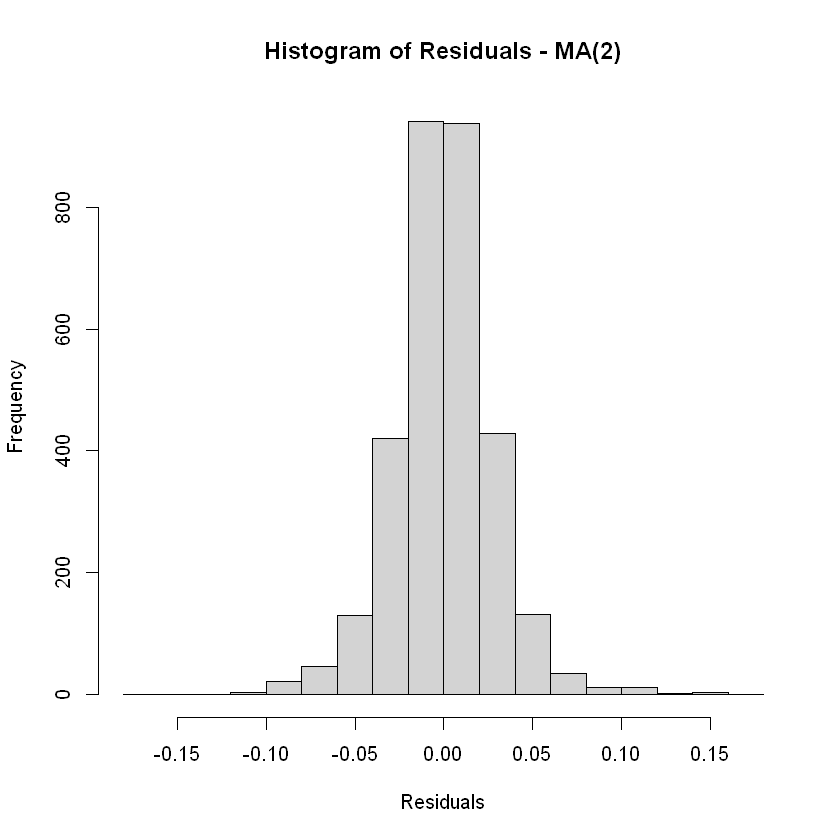

In [ ]:
# Create a histogram of MA(2) model residuals to visualize their distribution
hist(residuals_ma2, main="Histogram of Residuals - MA(2)", xlab="Residuals", ylab="Frequency")

Upon observing the Histogram of Residuals - MA(2), the symmetric distribution around zero implies that, on average, the residuals tend to balance out to zero. This symmetry suggests that the model is effectively capturing the underlying patterns in the data, resulting in residuals that oscillate around zero without any systematic bias towards positive or negative values. 

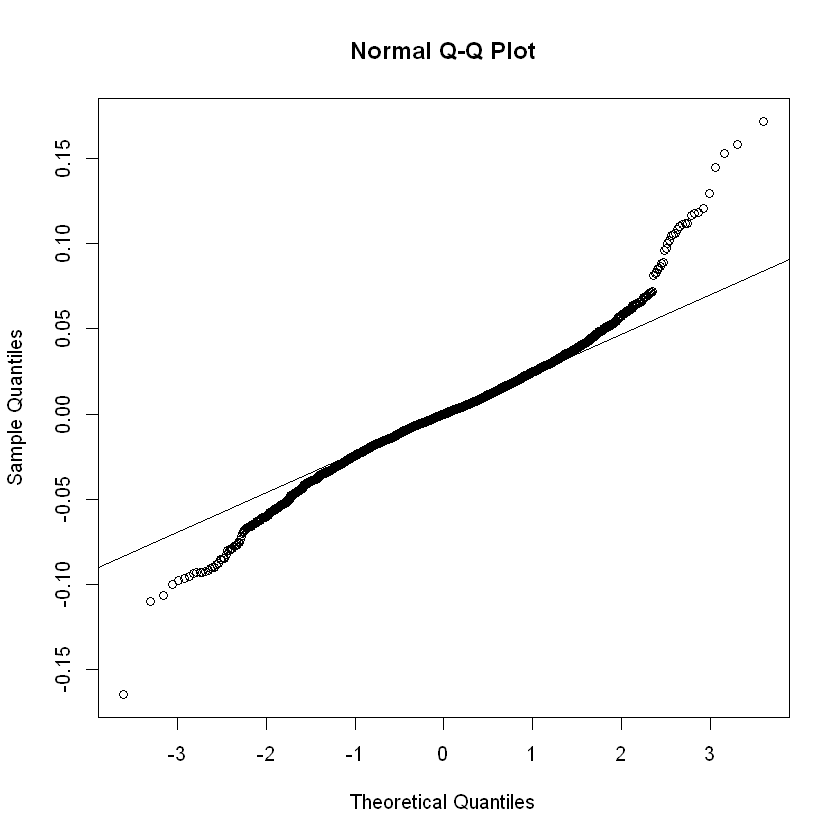

In [ ]:
# Create a QQ plot of MA(2) model residuals to assess normality assumption
qqnorm(residuals_ma2)
qqline(residuals_ma2)

After visualizing the QQ plot of the residuals, it became evident that the distribution of residuals deviates from the expected normal distribution, particularly towards the tails. This deviation from normality, indicates that the residuals may not follow a perfectly Gaussian distribution.

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test_ma2 <- shapiro.test(residuals_ma2)

# Print the results of the Shapiro-Wilk test
shapiro_test_ma2


	Shapiro-Wilk normality test

data:  residuals_ma2
W = 0.97085, p-value < 2.2e-16


The Shapiro-Wilk normality test was performed on the residuals of the ARIMA(1,0,2) model, yielding a test statistic (W) of 0.97085 and a p-value less than 2.2e-16. This result indicates a significant departure from normality in the residuals. The low p-value suggests strong evidence against the null hypothesis of normality, implying that the residuals are not normally distributed.

<a id='The AR(2) model'></a>
### 5) The AR(2) model

In [ ]:
 # Fit the AR(2) model
ar2_model <- arima(train_data, order=c(2, 0, 0))

In [ ]:
# Obtain residuals
residuals_ar2 <- residuals(ar2_model)

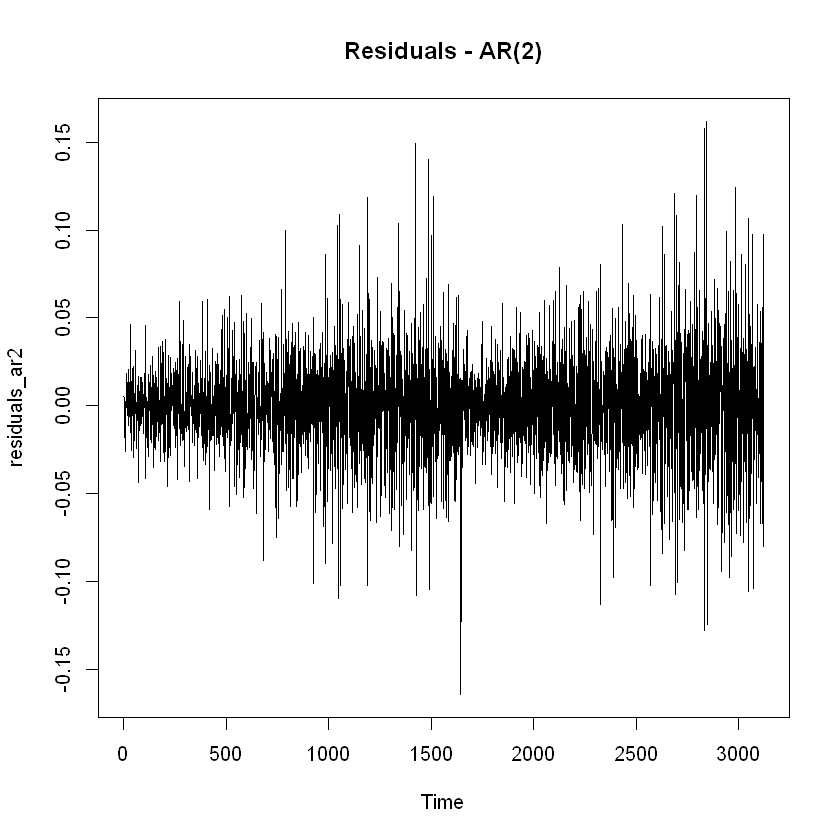

In [ ]:
# Plot residuals for visual inspection
plot(residuals_ar2, main="Residuals - AR(2)")

Upon examining the plot of Residuals - AR(2), it suggests that the variance is likely relatively stable, although not strictly constant. The consistent spread of points around the zero line indicates a degree of uniform variability in residuals. Additionally, the symmetrical distribution of points above and below the zero line confirms a zero mean, signifying balanced deviations from the mean in both positive and negative directions. Overall, while the variance may not be perfectly constant, the observed pattern indicates a reasonable level of stability.

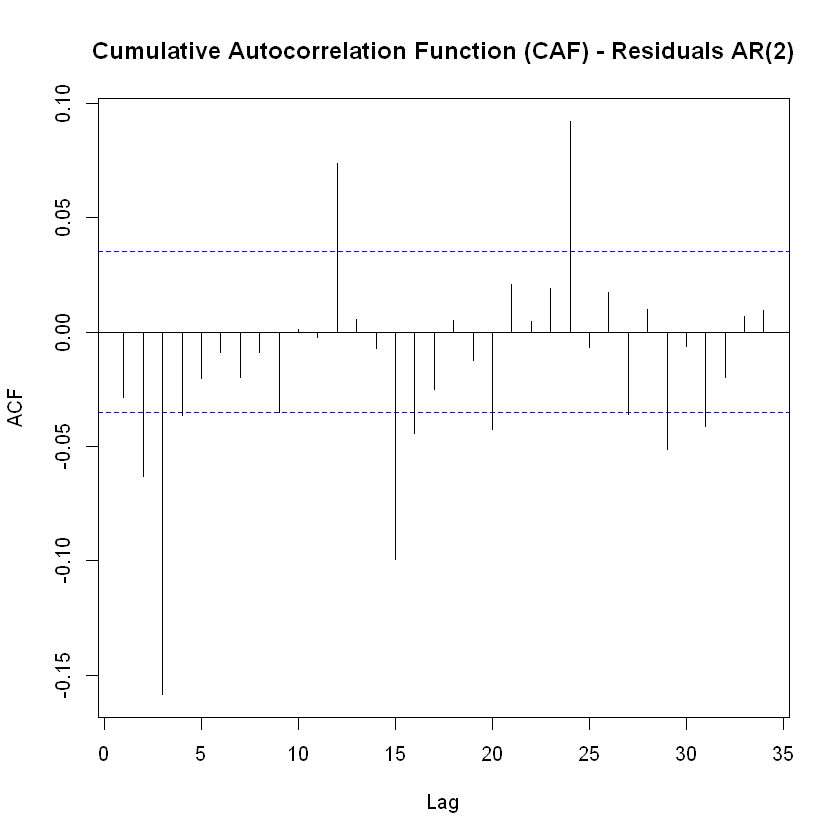

In [ ]:
# Plot Cumulative Autocorrelation Function (CAF)
acf(residuals_ar2, main="Autocorrelation Function (ACF) - Residuals AR(2)")

Upon reviewing the Autocorrelation Function (ACF) - Residuals AR(2) plot, we notice that most of bars lie within the confidence interval. This observation suggests that the autocorrelations of the residuals are not significantly different from zero, indicating uncorrelated residuals and a well-fitted model.

In [ ]:
# Perform Ljung-Box Test
ljung_box_test_ar2 <- Box.test(residuals_ar2, lag = 20, type = "Ljung-Box")

# Print test results
print(ljung_box_test_ar2)


	Box-Ljung test

data:  residuals_ar2
X-squared = 167.1, df = 20, p-value < 2.2e-16



The Ljung-Box test statistic is 167.1 with 20 degrees of freedom, resulting in a p-value less than 2.2e-16, which is significantly smaller than the typical significance level (α = 0.05). This indicates strong evidence against the null hypothesis of no autocorrelation, suggesting that autocorrelation exists in the residuals.

In [ ]:
# Convert residuals of AR(2) model to binary based on sign (Positive/Negative)
residuals_binary_ar2 <- ifelse(residuals_ar2 >= 0, "Positive", "Negative")

# Convert binary residuals to a factor with levels ordered as "Negative" and "Positive"
residuals_factor_ar2 <- factor(residuals_binary_ar2, levels = c("Negative", "Positive"))

# Run a runs test on the factorized residuals to assess randomness in sign patterns
runs_test_ar2 <- runs.test(residuals_factor_ar2)

# Print the results of the runs test
runs_test_ar2


	Runs Test

data:  residuals_factor_ar2
Standard Normal = -0.70988, p-value = 0.4778
alternative hypothesis: two.sided


The Runs Test produces a Standard Normal value of -0.70988 and a p-value of 0.4778. Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there isn't sufficient evidence to conclude that the distribution of runs in the residuals deviates from randomness. Therefore, it implies that the distribution of runs in the residuals may follow a random pattern.

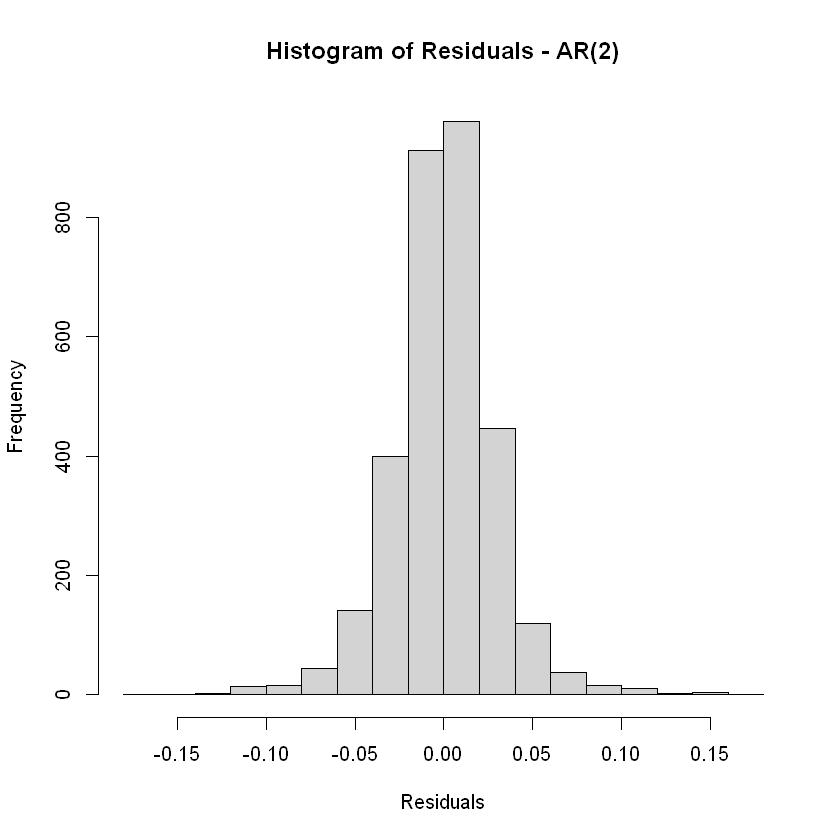

In [ ]:
# Create a histogram of AR(2) model residuals to visualize their distribution
hist(residuals_ar2, main="Histogram of Residuals - AR(2)", xlab="Residuals", ylab="Frequency")


Upon observing the Histogram of Residuals - AR(2), the symmetric distribution around zero implies that, on average, the residuals tend to balance out to zero. This symmetry suggests that the model is effectively capturing the underlying patterns in the data, resulting in residuals that oscillate around zero without any systematic bias towards positive or negative values. 

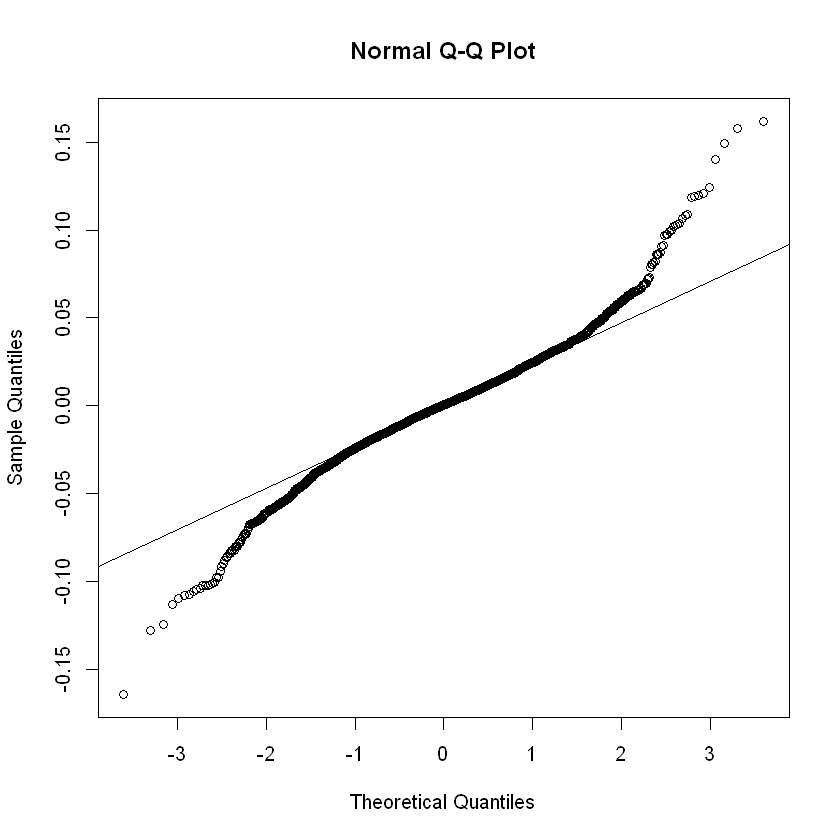

In [ ]:
# Create a QQ plot of AR(2) model residuals to assess normality assumption
qqnorm(residuals_ar2)
qqline(residuals_ar2)

After visualizing the QQ plot of the residuals, it became evident that the distribution of residuals deviates from the expected normal distribution, particularly towards the tails. This deviation from normality, indicates that the residuals may not follow a perfectly Gaussian distribution.

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test_ar2 <- shapiro.test(residuals_ar2)

# Print the results of the Shapiro-Wilk test
shapiro_test_ar2


	Shapiro-Wilk normality test

data:  residuals_ar2
W = 0.96874, p-value < 2.2e-16


The Shapiro-Wilk normality test was conducted on the residuals of the ARIMA(2,0,0) model, resulting in a test statistic (W) of 0.96874 and a p-value less than 2.2e-16. This outcome indicates a significant deviation from normality in the residuals. The small p-value suggests strong evidence against the null hypothesis of normality, implying that the residuals are not normally distributed.

**Conclusion:** After fitting each of the models—AR(2), MA(1), MA(2), ARIMA(2,0,1), and ARIMA(2,0,2)—we evaluated the quality of their residuals. Among these models, the AR(2) model demonstrated superior performance, leading us to select it for further forecasting endeavors.

<a id='Forecasting'></a>
##  Forecasting

In this section, we outline the techniques used for forecasting future observations, employing the best final selected model determined from our analysis. These forecasts are compared with test data to assess the model's predictive performance.

In [ ]:
print(dim(data))

[1] 3288    2


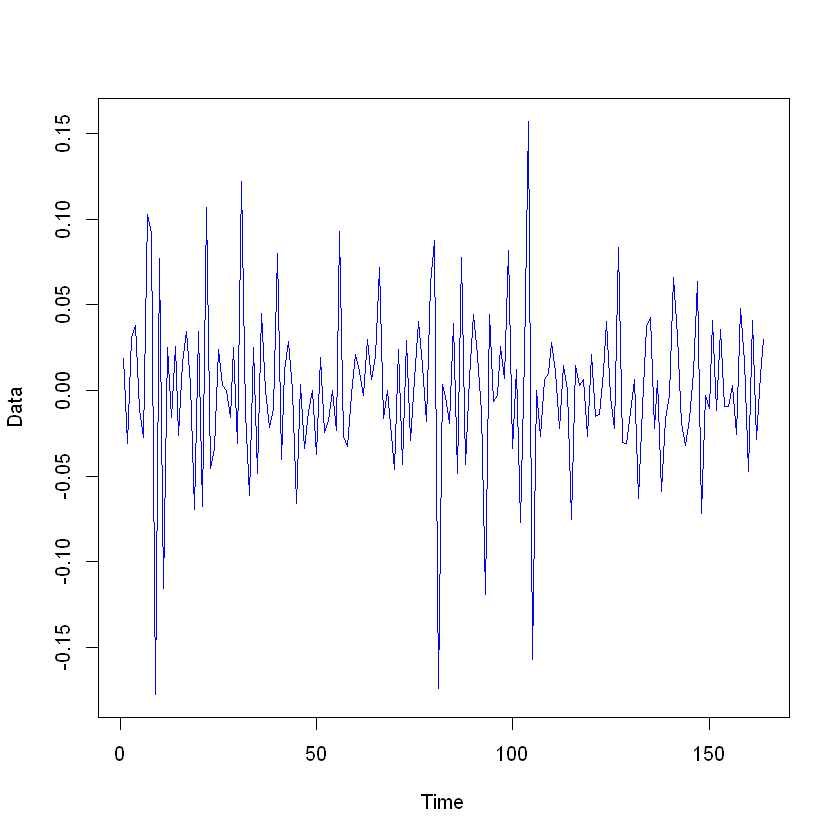

In [ ]:
# Plot the original test data along with the forecasted values
plot(test_data, type = "l", col = "blue", ylim = range(c(test_data, forecast_values$pred)), ylab = "Data", xlab = "Time")

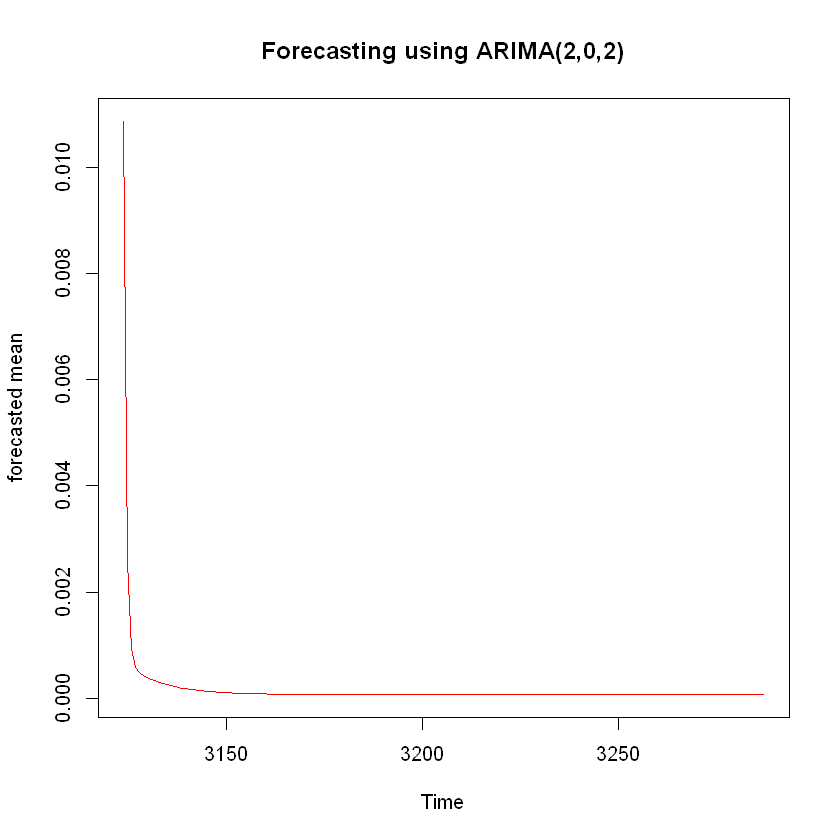

In [ ]:
# Fit an autoregressive model of order 2 (AR(2)) to the training data
ar2_model <- arima(train_data, order = c(2, 0, 2))

# Define the future horizon for forecasting
future_horizon <- length(test_data)

# Generate forecasts using the ARIMA model
ar2_forecasts <- predict(ar2_model, n.ahead = future_horizon)

# Create a time index for the forecasted values
forecast_index <- seq(length(train_data) + 1, length(train_data) + future_horizon)

# Plot the original time series and the forecasts
plot(forecast_index, ar2_forecasts$pred, type = 'l', xlab = 'Time', ylab = 'forecasted mean', 
     main = 'Forecasting using ARIMA(2,0,2)', col = 'red')


We can notice that the difference between the forecasts and the test data suggests that even the best model may not perfectly capture all aspects of the data.

## Discussion

This project represents a careful journey from data collection to model selection aimed at forecasting temperature anomalies. Beginning  with meticulous data collection, ensuring the acquisition of consistent and reliable temperature anomaly data over time. Subsequently, rigorous cleaning and transformation procedures were implemented to maintain data integrity, crucial for accurate analysis. Exploratory Data Analysis (EDA) techniques were then applied to uncover underlying patterns within the temperature anomalies, including trends, seasonality, and potential outliers. Stationarity testing  was crucial to assess the stability of the time series data, enabling appropriate transformations to be applied if necessary . Model selection involved conducting ACF and PACF analysis, as well as AIC Test for Model Identification and BIC Test for Model Identification, to determine the candidate models ; AR2, MA1, MA2, ARIMA(2,0,1), and  ARIMA(2,0,2). We carefully evaluated each model's performance throught residual analysis, considering criteria such as the residuals being uncorrelated, having zero mean, exhibiting constant variance, and being normally distributed. Based on these analyses, the AR(2) model emerged as optimal, demonstrating superior performance across these criteria. Ultimately, the selected model AR(2) was utilized to forecast future temperature anomalies.

However, challenges arose during the forecasting process, as the selected model AR(2) faced difficulties in accurately predicting future temperature anomalies. This highlights the inherent limitations of any model, as no model is perfect. Despite these challenges, our detailed analytical approach provides valuable insights into climate dynamics and emphasizes the importance of continued research in this field.